In [69]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import numpy as np
from itertools import zip_longest
import itertools as itertools

# app produces the package ID as part of the csv 

In [70]:
    
def prepareCsvForPkgId(input_file):
    """
    Input:
        file (string): Is a csv produced by the app after 11.09.2020 containing info on the package ID. 
    Returns:
        file (dataframe): A kind of cleaned dataframe with an evenly space timestamp as index 
    """
    file = pd.read_csv(input_file)
    file = file.iloc[1:]
    file.columns = file.iloc[0]

    file = file[1:].apply(pd.to_numeric, errors='ignore')

    # to evenly set the timestamps 
    length = len(file.index) # length of dataframe
    stop = length*4 # stop point 
    index_evenly = np.linspace(0, stop, num = length, endpoint = False) # to adapt timestamp  
    file.loc[:,"Time"] = index_evenly #set the time as index, relevant for later plotting

    ids= file.index.tolist() # these are all the package ids (as strings because, yes pandas of course we want that as strings, strings are soooo useful..Not)
    ids = [int(one_id) for one_id in ids] # now they are ints


    file.set_index('Time', inplace=True)
    # 
    filename = input_file[20:-4]
    return file, ids,filename # no idea why, but the name of the index still includes "Pkg ID", the id not actually the index. Time is .. 



def grouper(iterable, n, fillvalue=None): # copied from StackOverflow
    args = [iter(iterable)] * n
    toReturn = list(zip_longest(*args, fillvalue=fillvalue)) # includes now the data types I want to work with (namely list of lists)
    toReturn = [list(oneChunk) for oneChunk in toReturn] # because one cannot turn tuples into sets. 
    return toReturn

The plan is to devide the list of Package Ids into chunks of 16. In a best case scenario, each chunk should contain all 16 values, if not, some Id was dropped. Find out how many chunks are incomplete. This approach is not perfect as extracting the exact info which id/how many pkgs/where the id is missing is not given but plotting the general area of a missed package should suffice. We'll see 

In [71]:
testfile, testIds,filename = prepareCsvForPkgId("02-09-2020_15-24-42_test.csv")

result_dict = {"Name": [], "Total": [], "Complete": [], "Ratio":[]}
result_df = pd.DataFrame(data=result_dict)

IdChunkList = grouper(testIds, 16, 20) # 20 is just a random number bigger than the largest value in set (to fill the last set )
# list with the chunks as list
perfectSet ={1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 0}
# list with tuples

#print(IdChunkList)
ratio = []
for chunk in IdChunkList:
    isSet = perfectSet.issubset(set(chunk))
    ratio.append(isSet)
    #print(isSet)
ratio_abs = sum(ratio)/len(ratio)
print("Of {} chunks, {} contain all package Ids. The complete to incomplete ratio of the experiment ~{}~ is: {}.".format(len(ratio), sum(ratio), filename, ratio_abs))

result_df.append({"Name": filename, "Total": len(ratio), "Complete":sum(ratio), "Ratio": ratio_abs}, ignore_index= True)

FileNotFoundError: [Errno 2] File b'02-09-2020_15-24-42_test.csv' does not exist: b'02-09-2020_15-24-42_test.csv'

[(1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -4, -3, -2, -1, 0, 1), (2, 3, 4, 5, 6, -8, -7, -6, -3, -1, 0, 1, 2, 3, 4, 5), (6, 7, -8, -7, -5, -4, -3, -2, 0, 1, 2, 3, 4, -8, -6, -3), (-1, 0, 1, 2, 3, 4, 5, 7, -8, -7, -6, -5, -4, -3, -2, -1), (0, 1, 3, 4, 5, 6, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1), (2, 4, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, 0, 1, 5, 7), (-7, -5, -4, -3, -2, -1, 0, 1, 2, 6, -8, -5, -3, -2, -1, 0), (1, 2, 3, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2), (3, 4, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3), (4, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4), (6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6), (7, -8, -7, -6, -5, -4, -3, -2, -1, 0, 2, 3, 4, 5, 7, -8), (-7, -6, -5, -4, -3, -2, -1, 0, 1, 3, 4, 5, 6, -8, -7, -6), (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, -8, -7, -4, -1), (1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -5, -3, -2, -1, 0, 1), (2, 3, 5, -6, -3, -1, 1, 3, 7, -7, -5, -4, -3, -2, -1, 0), (1, 2, 3, 4, 5, 6, 7, -8, -7, -2, 1, 3, 5, 7, -8, -7), (-6, -5, -4,

Pkg ID      Ch-1      Ch-2      Ch-3      Ch-4      Ch-5      Ch-6  Ch-7  \
Time                                                                       
0.0     0.005662 -1.634232  0.530738  1.739724  0.617158 -1.540660   NaN   
4.0     0.115922 -1.579698  0.592424  1.747770  0.651130 -1.496258   NaN   
8.0     0.194892 -1.512946  0.650832  1.736744  0.702088 -1.436956   NaN   
12.0    0.172840 -1.527846  0.639508  1.757902  0.701194 -1.453942   NaN   
16.0    0.064070 -1.599068  0.562326  1.759094  0.655302 -1.486126   NaN   

Pkg ID  Ch-8  NaN  NaN  NaN  NaN  NaN Pkg  
Time                                       
0.0      NaN  NaN  NaN  NaN  NaN  NaN   1  
4.0      NaN  NaN  NaN  NaN  NaN  NaN   2  
8.0      NaN  NaN  NaN  NaN  NaN  NaN   3  
12.0     NaN  NaN  NaN  NaN  NaN  NaN   4  
16.0     NaN  NaN  NaN  NaN  NaN  NaN   5  
False
0 32
False
16 48
False
32 64
False
48 80
False
64 96
False
80 112
False
96 128
False
112 144
False
128 160
False
144 176
False
160 192
False
176 208
Fals

C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
336 368
False
352 384
False
368 400
False
384 416
False
400 432
False
416 448


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
432 464
False
448 480
False
464 496
False
480 512
False
496 528


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
512 544
False
528 560
False
544 576
False
560 592
False
576 608


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
592 624
False
608 640
False
624 656
False
640 672
False
656 688


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
672 704
False
688 720
False
704 736
False
720 752


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


False
736 768
False
752 784
True
False
784 816
False
800 832


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

True
True
False
848 880
True
True
True
True
False
928 960
False
944 976
True
False
976 1008


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

True
True
True
True
True
True
True
False
1104 1136
True
True
False
1152 1184
True
False
1184 1216
False
1200 1232
True

C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp


False
1232 1264
False
1248 1280
False
1264 1296
True
True
False
1312 1344
True

C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp


True
False
1360 1392
False
1376 1408
True
True
True
False
1440 1472
True
False
1472 1504


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
1488 1520
True
True
True
True
True
False
1584 1616
False
1600 1632
False
1616 1648
False
1632 1664


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

False
1648 1680
True
False
1680 1712
False
1696 1728
True
True
False
1744 1776
True

C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp


True
True
True
True
True
False
1856 1888
False
1872 1904


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


True
False
1904 1936
True
False
1936 1968
False
1952 1984
True
False
1984 2016


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

True
True
True
True
False
2064 2096
False
2080 2112
True
True
True
True
False
2160 2192
True
False
2192 2224
False
2208 2240


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

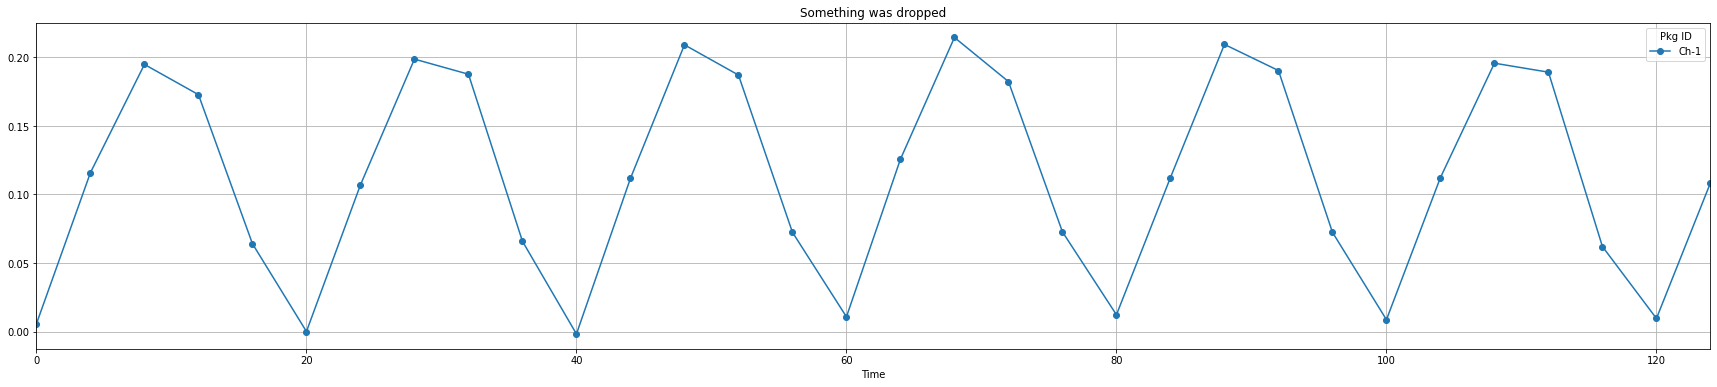

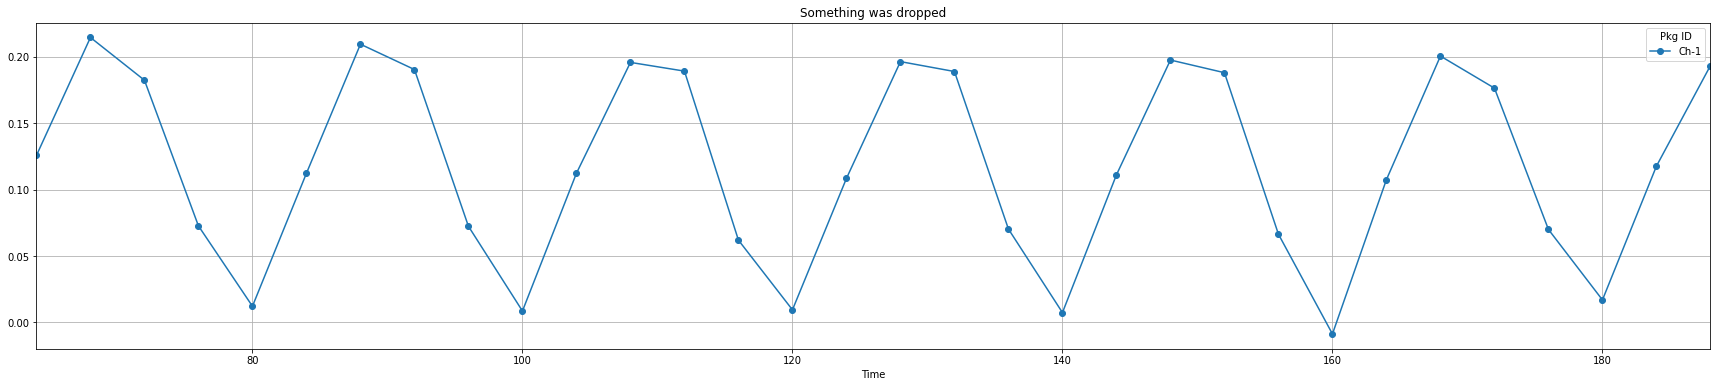

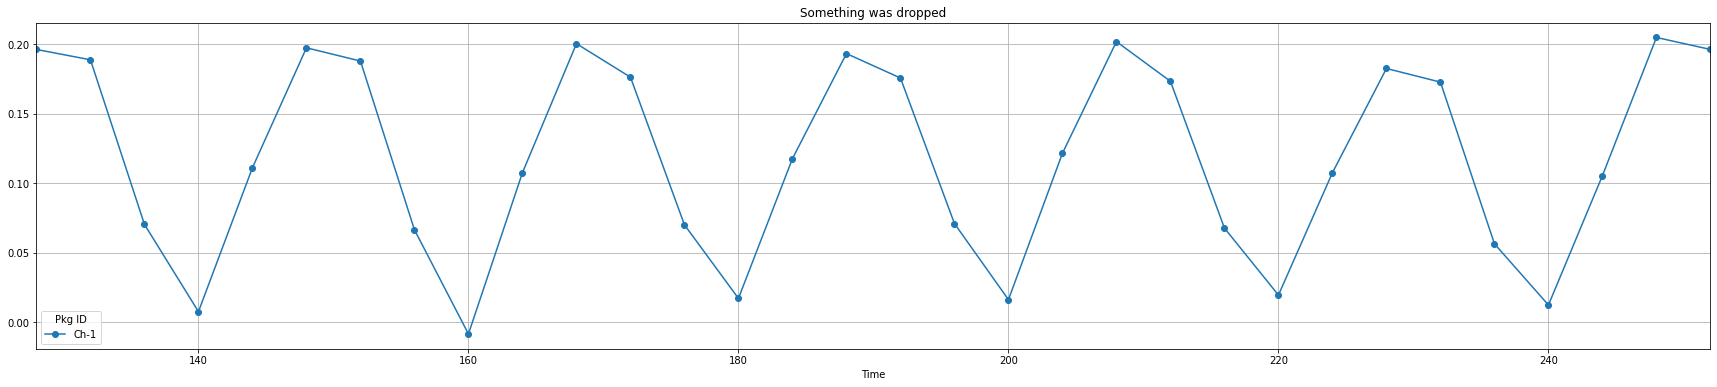

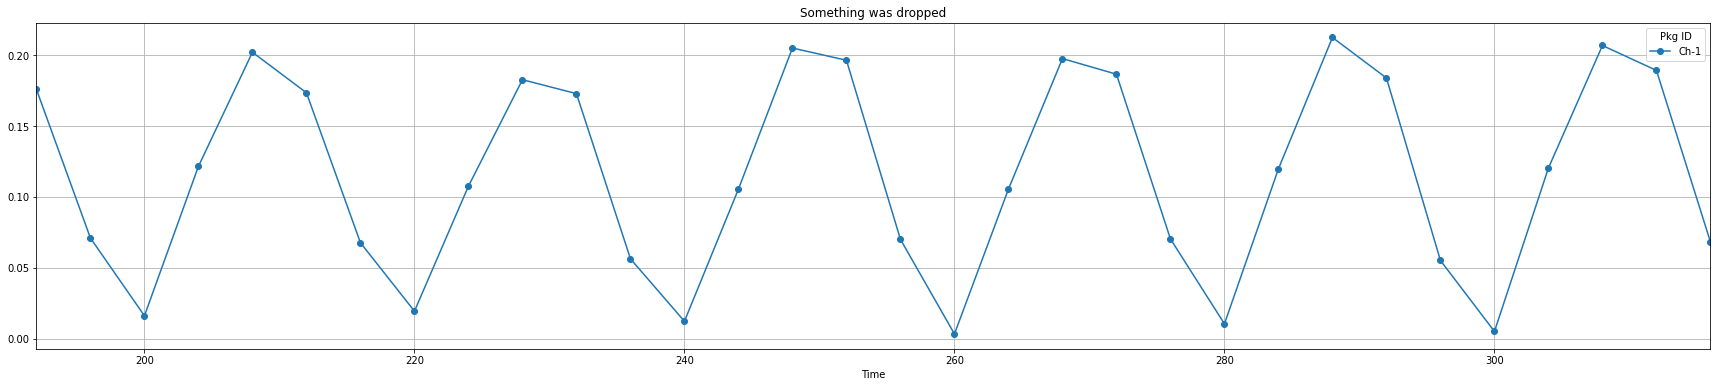

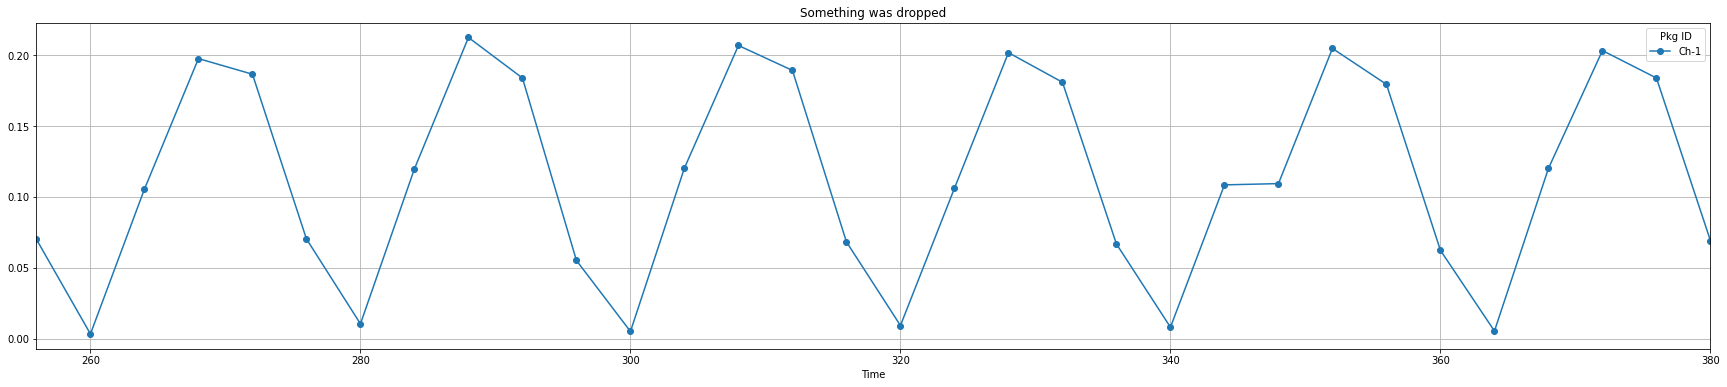

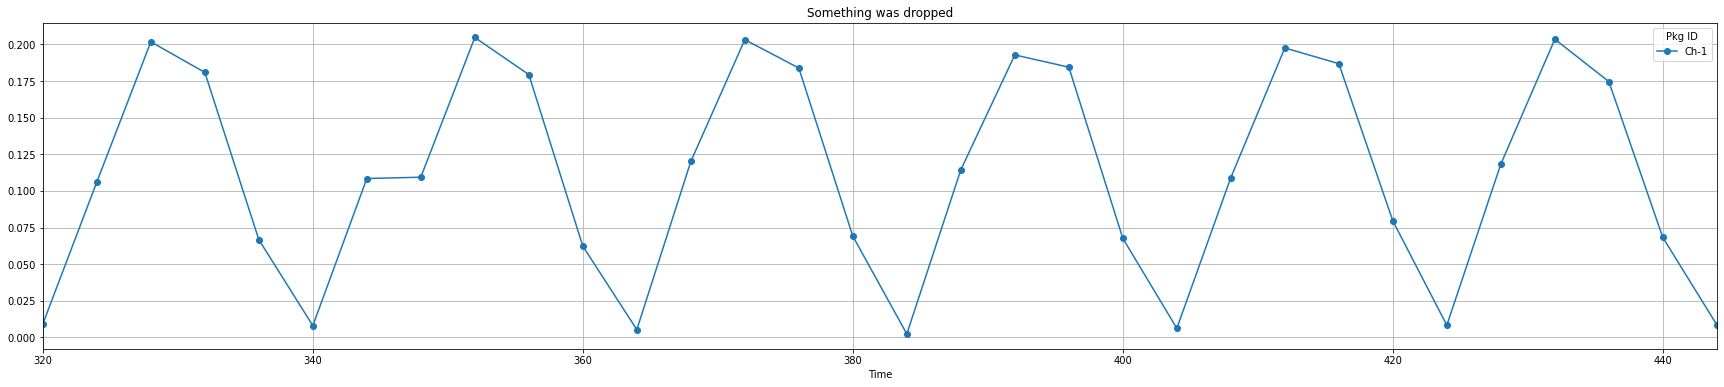

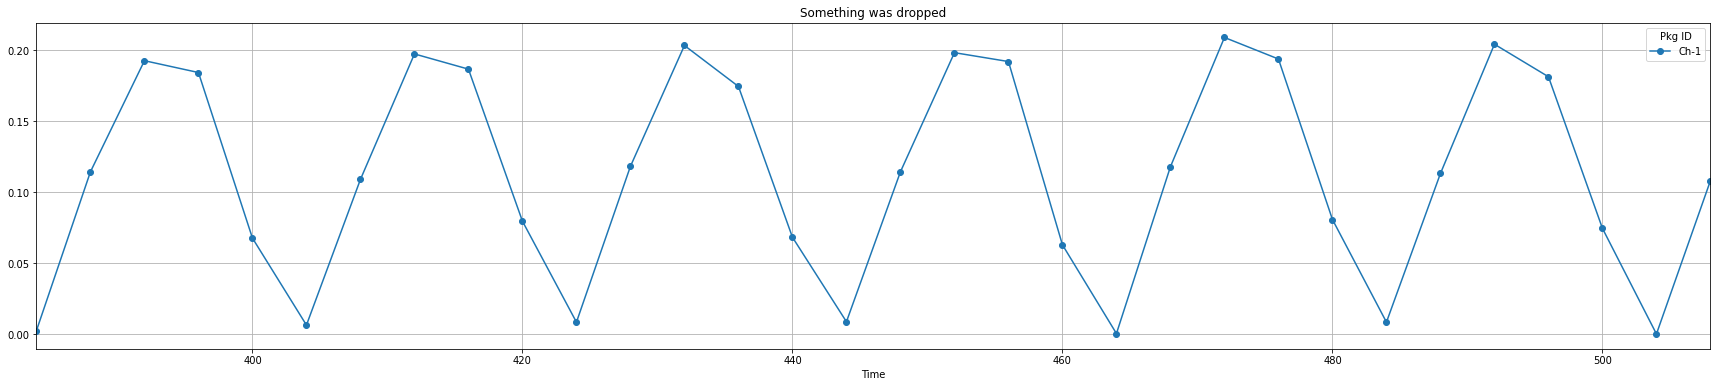

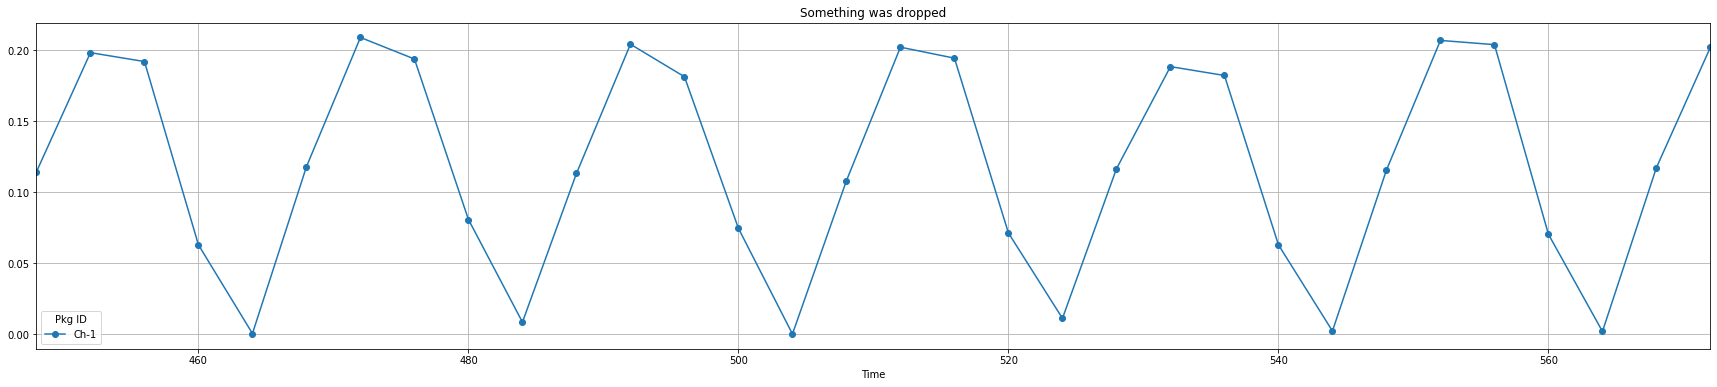

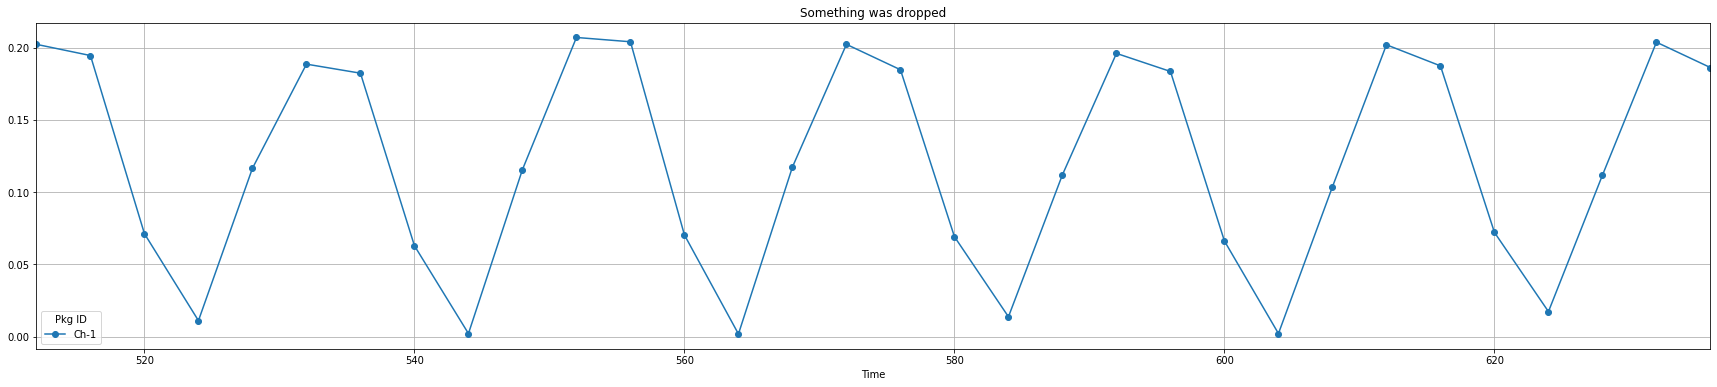

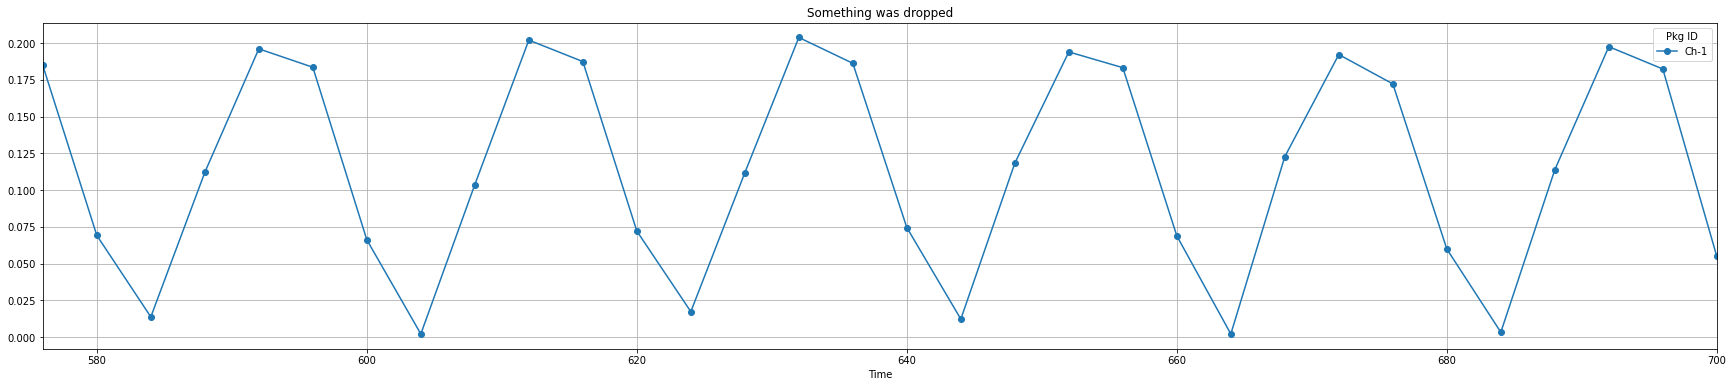

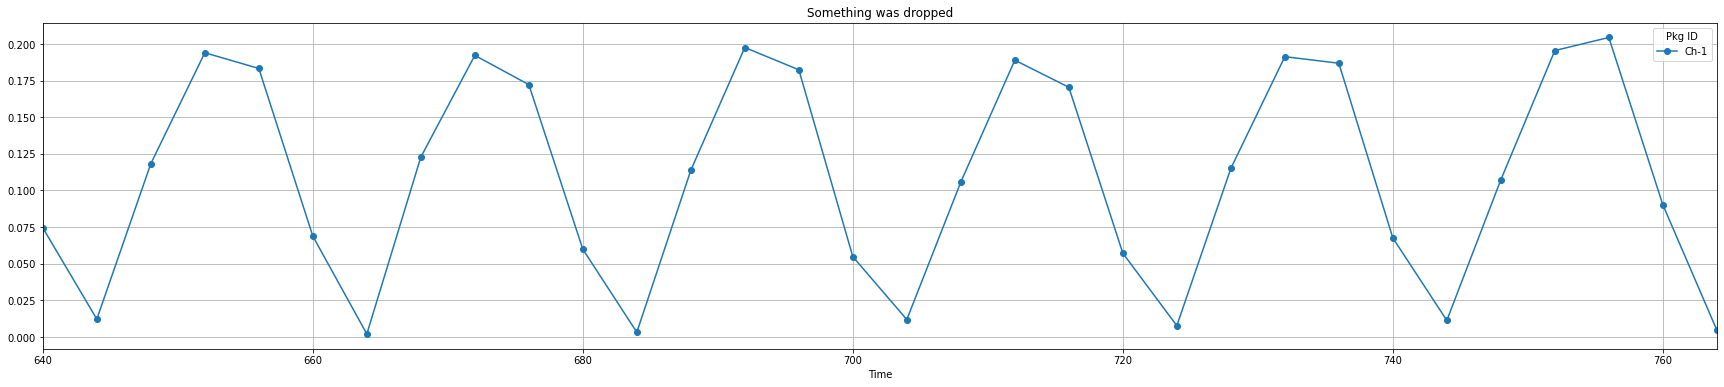

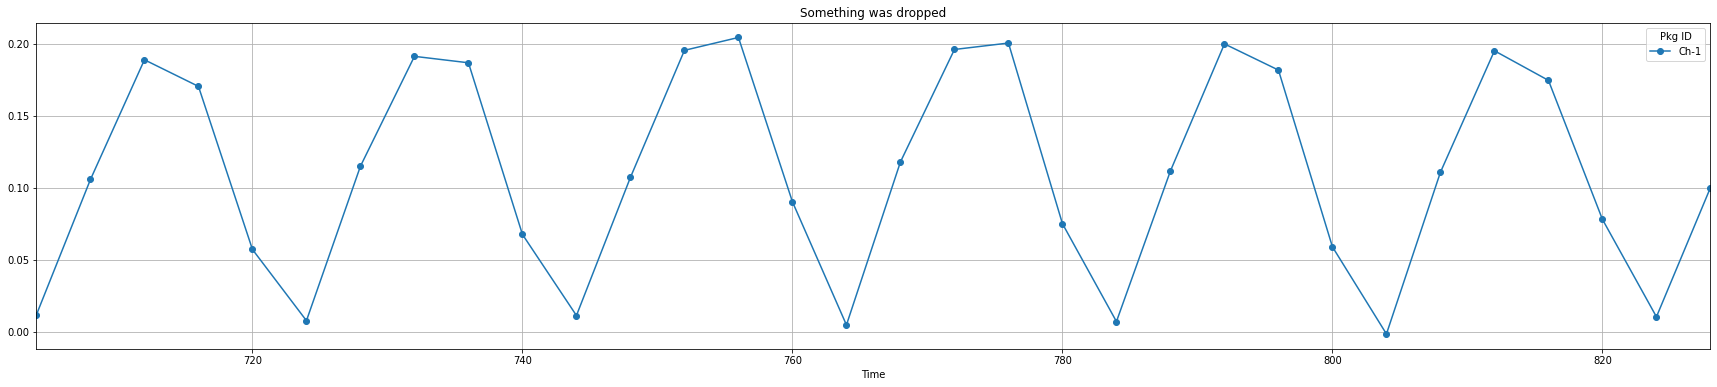

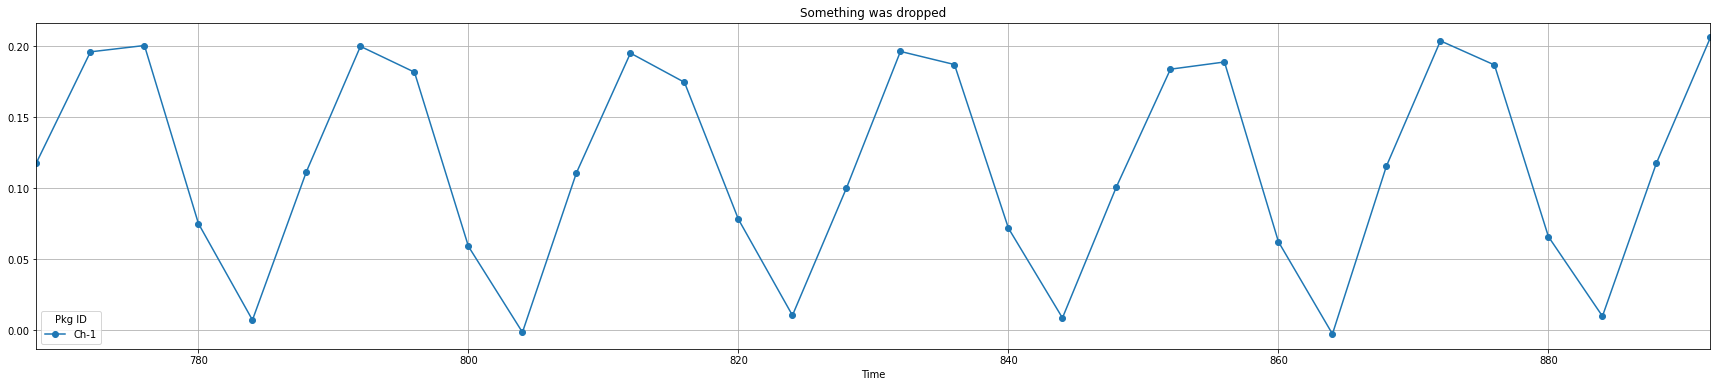

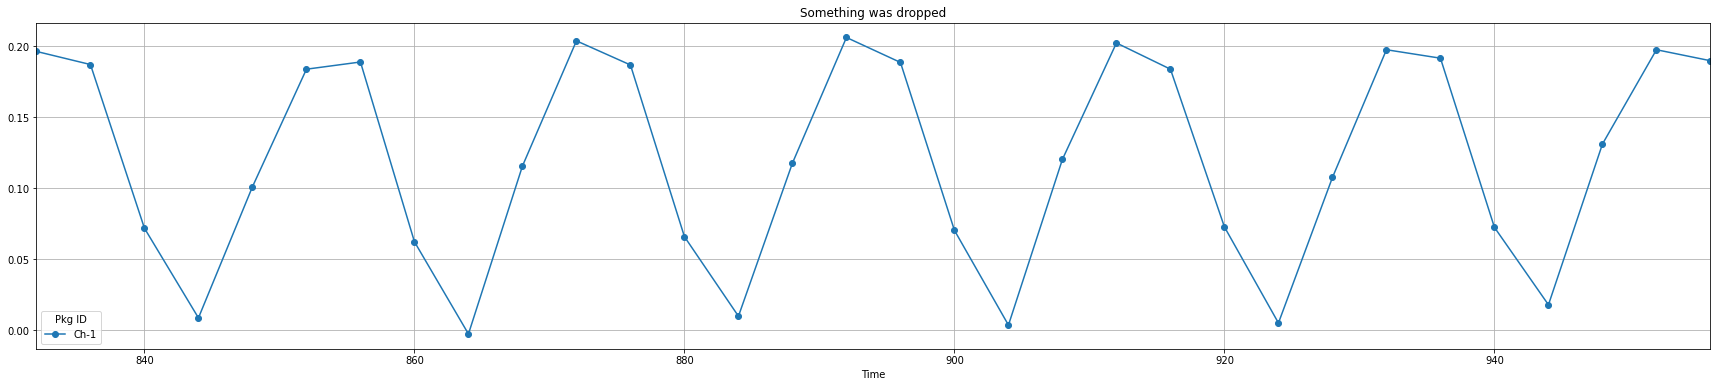

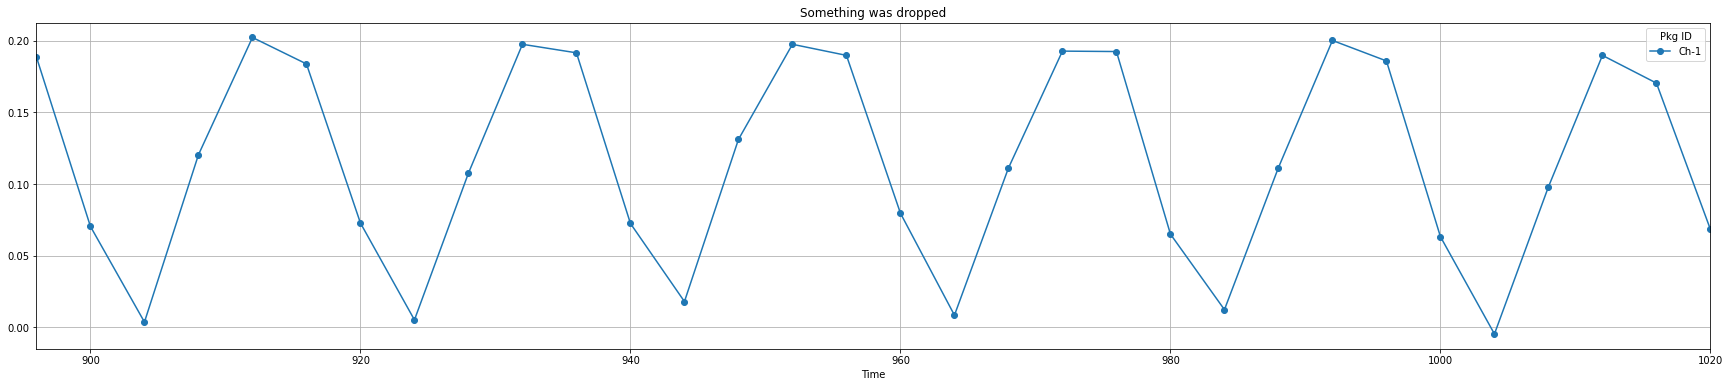

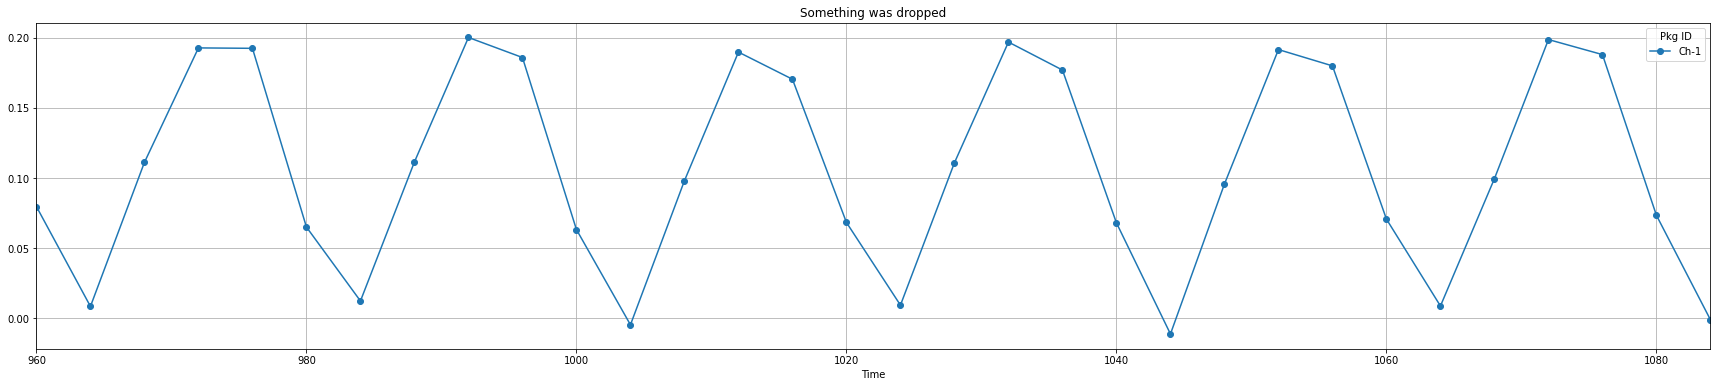

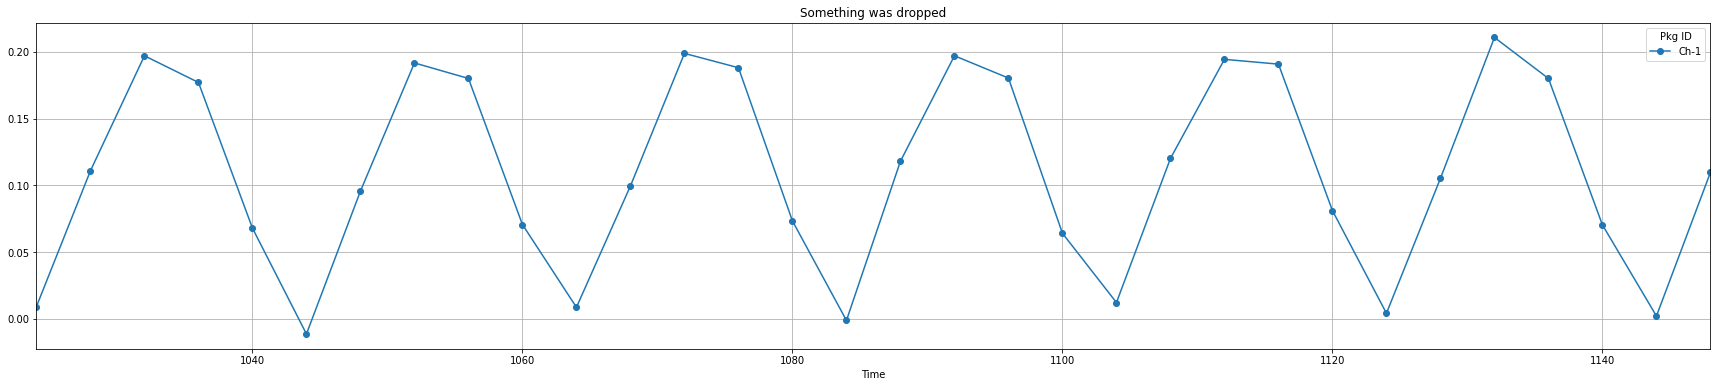

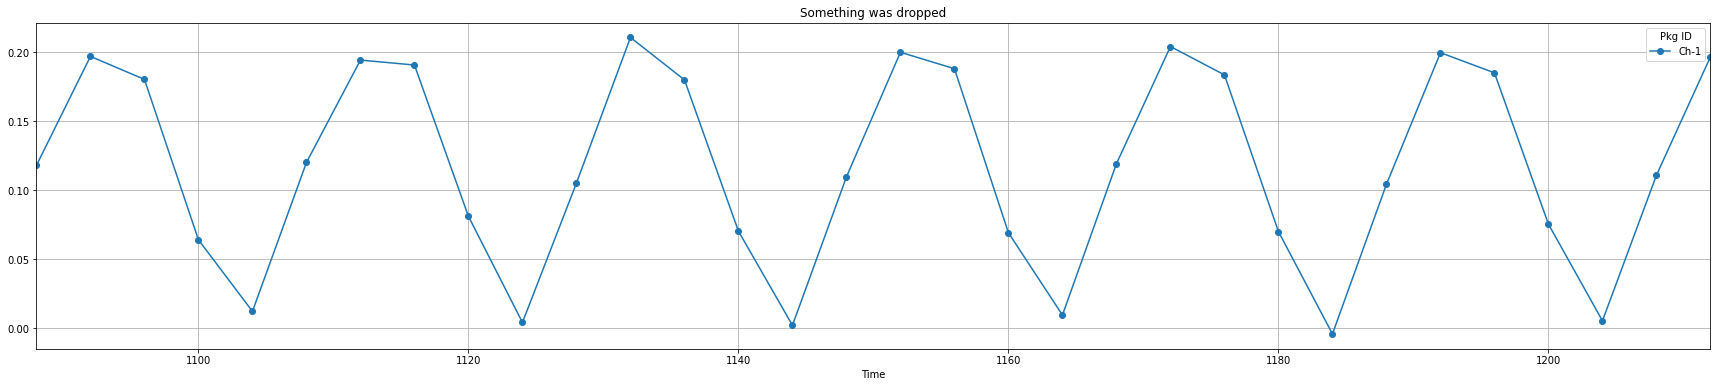

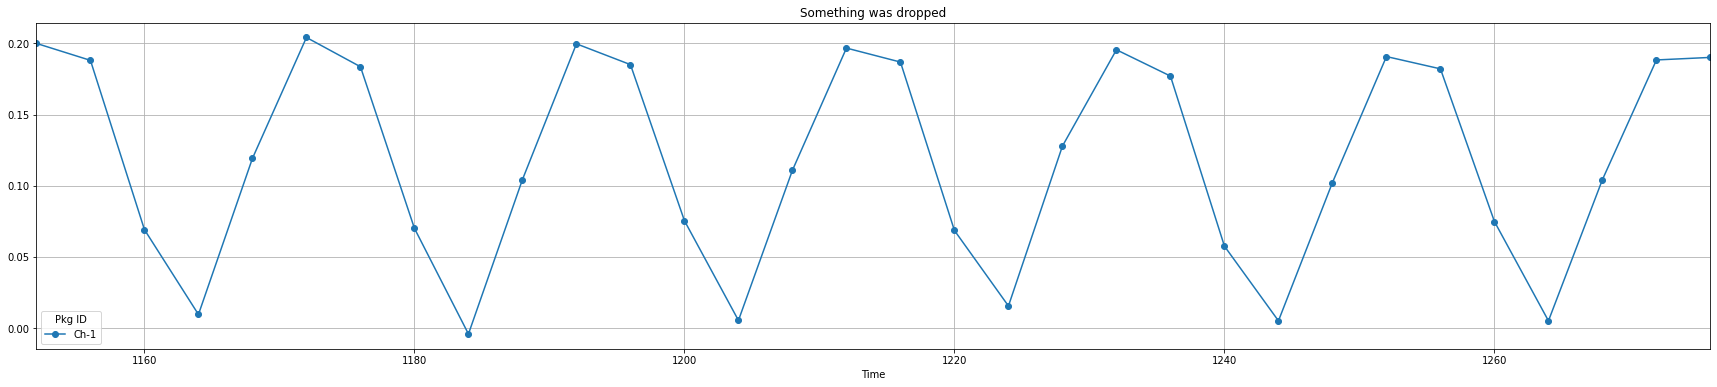

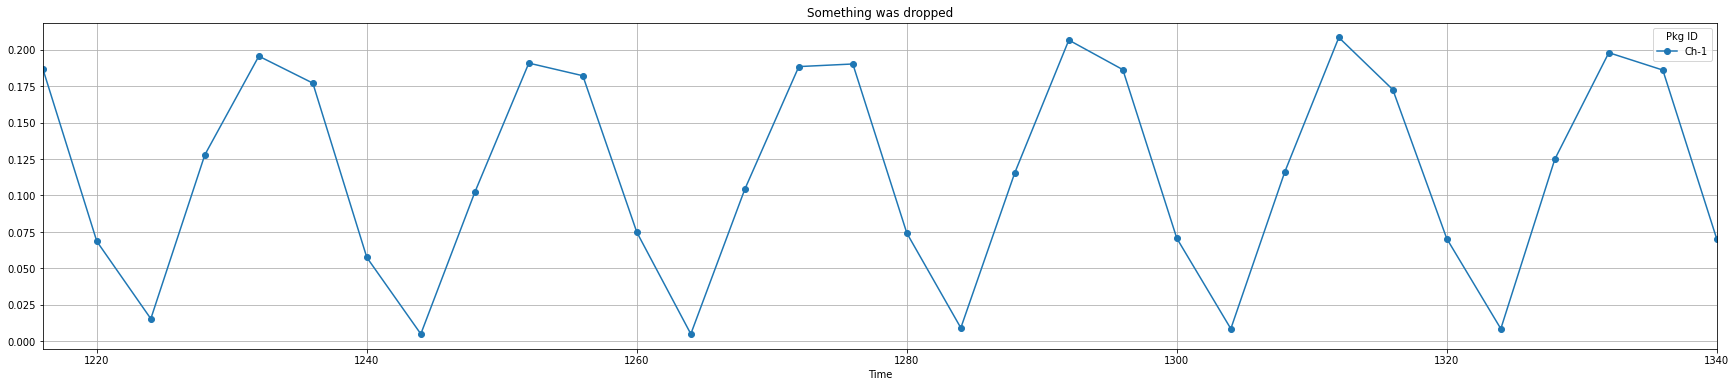

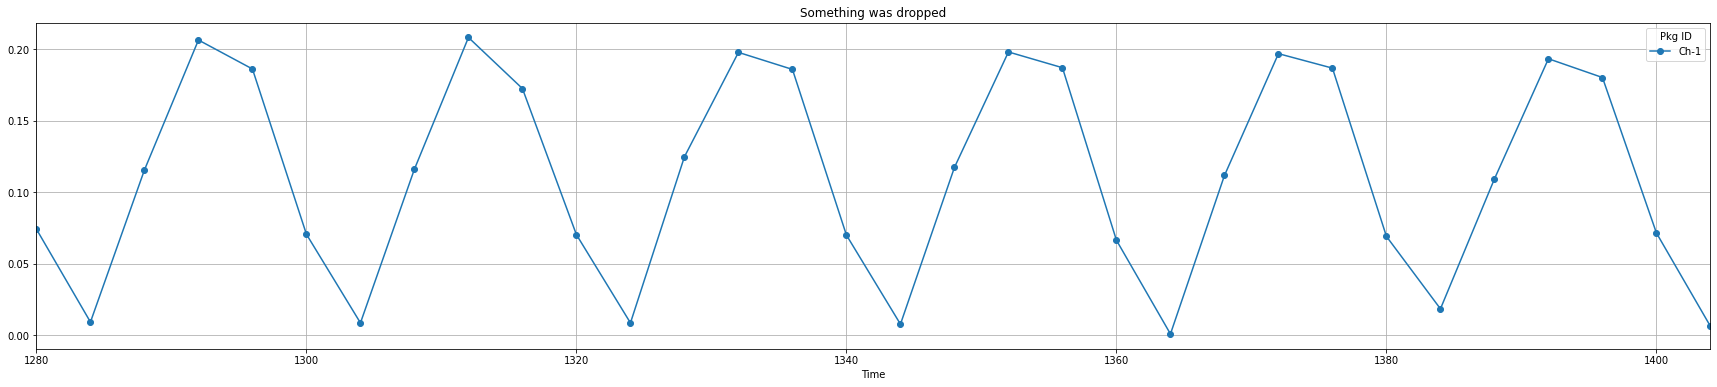

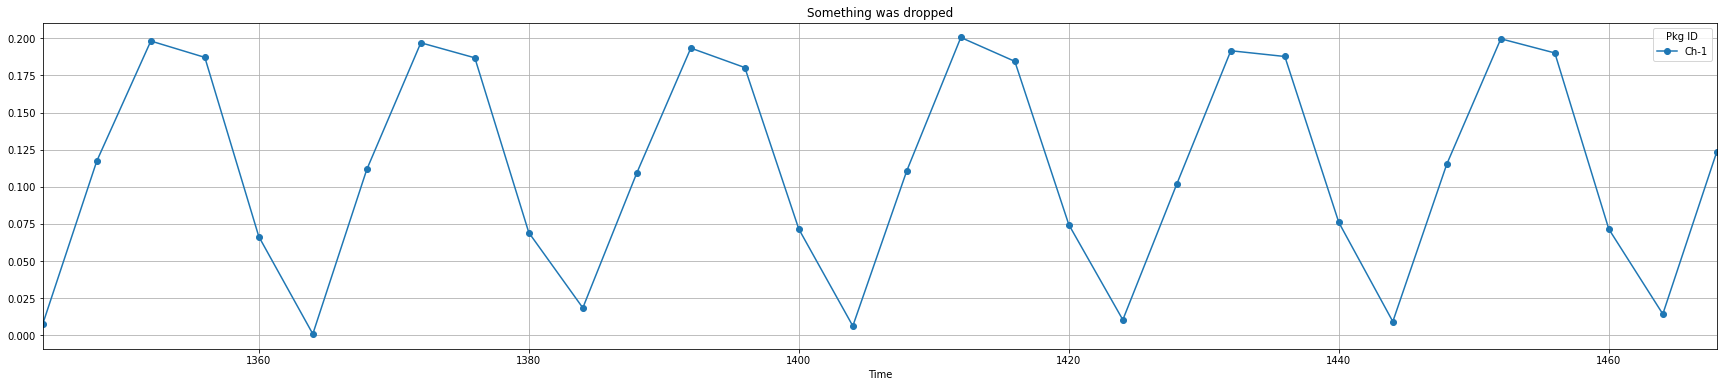

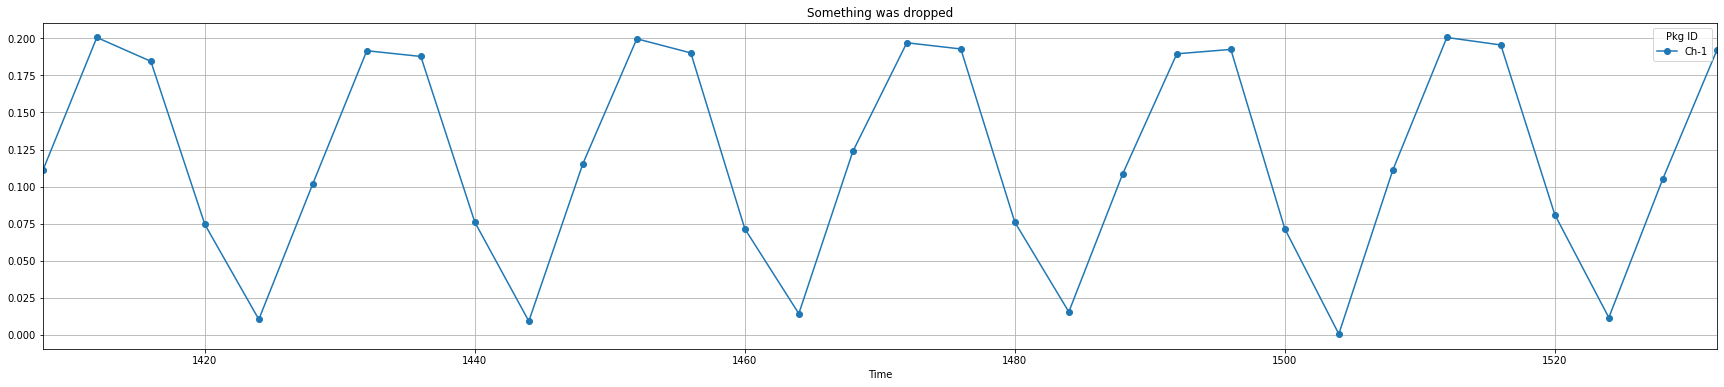

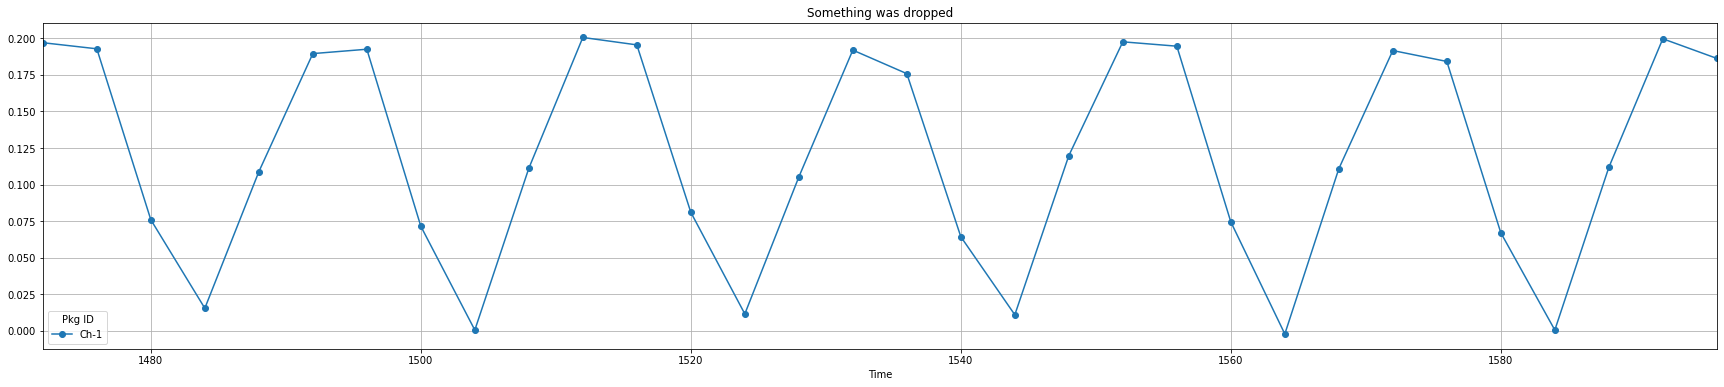

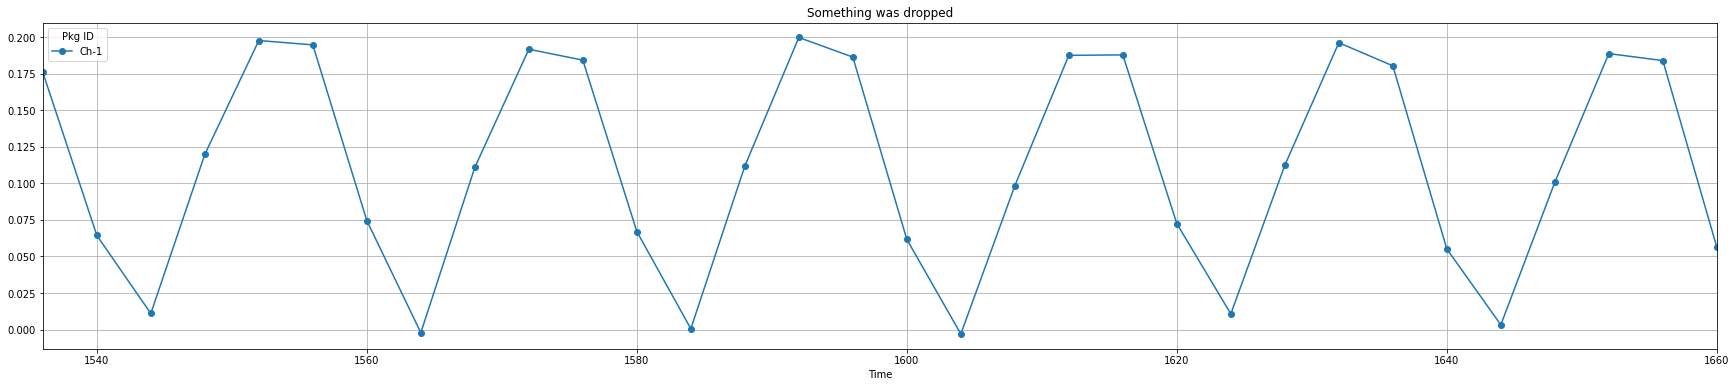

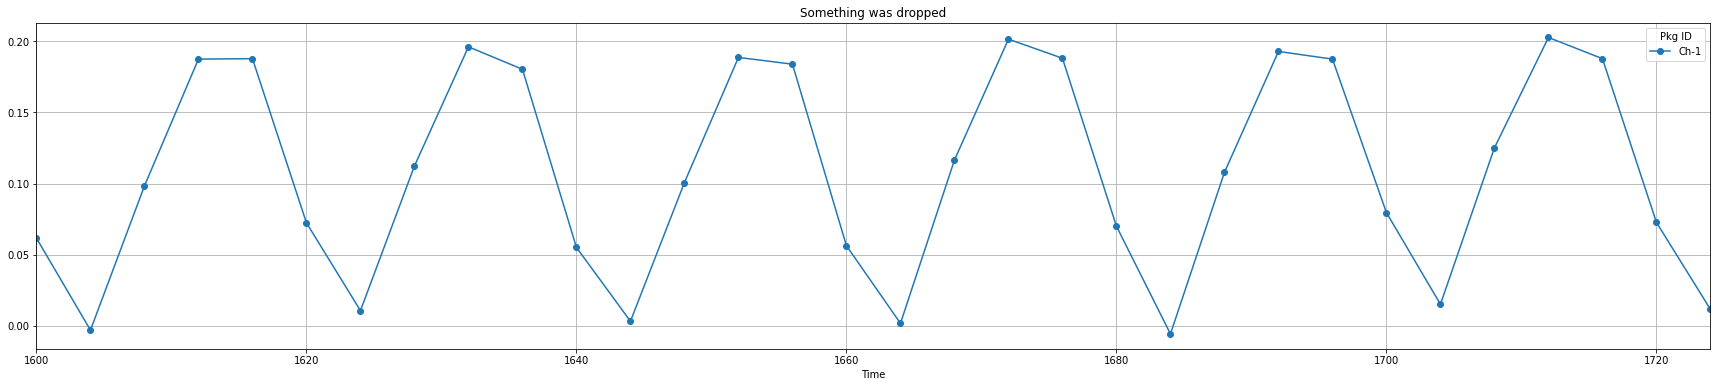

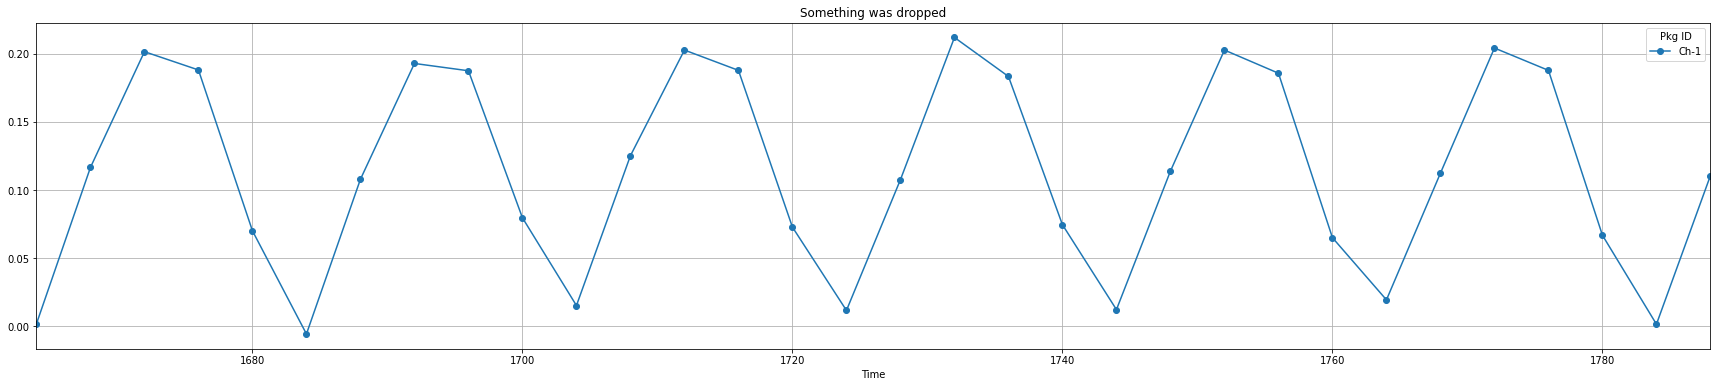

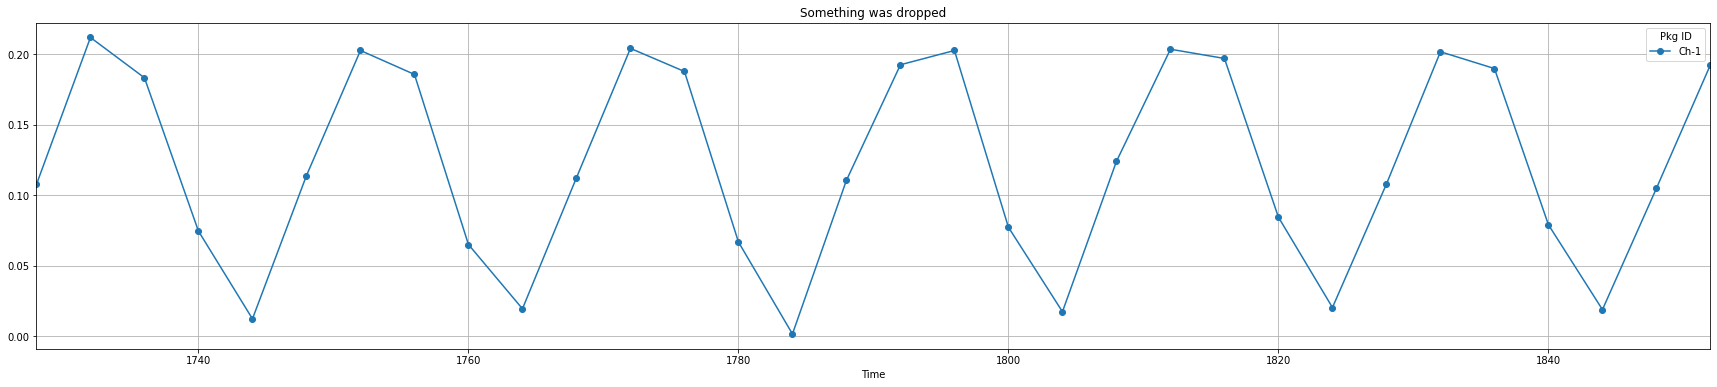

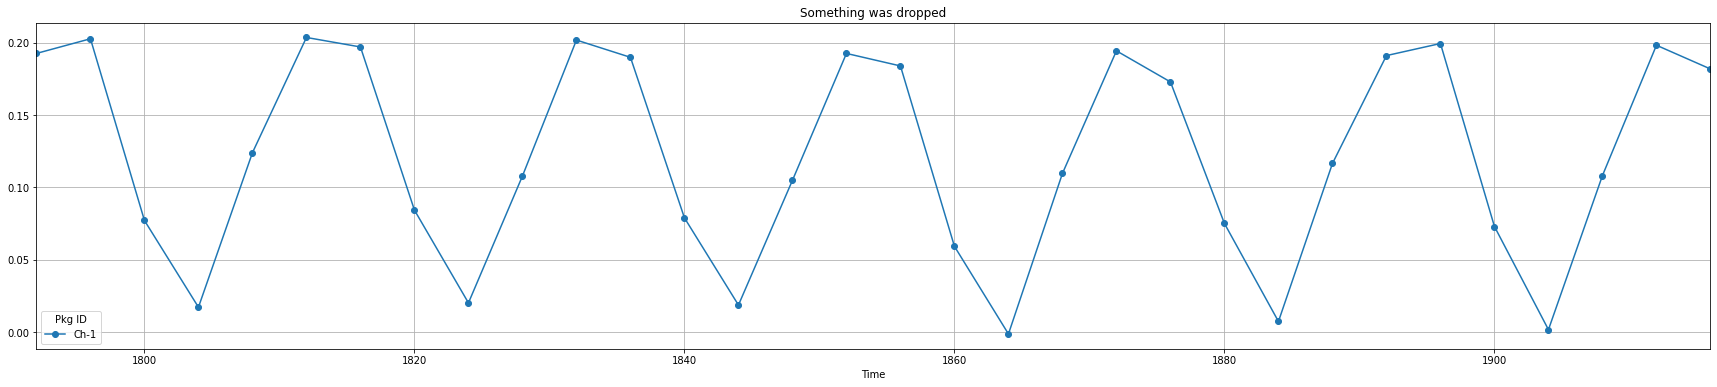

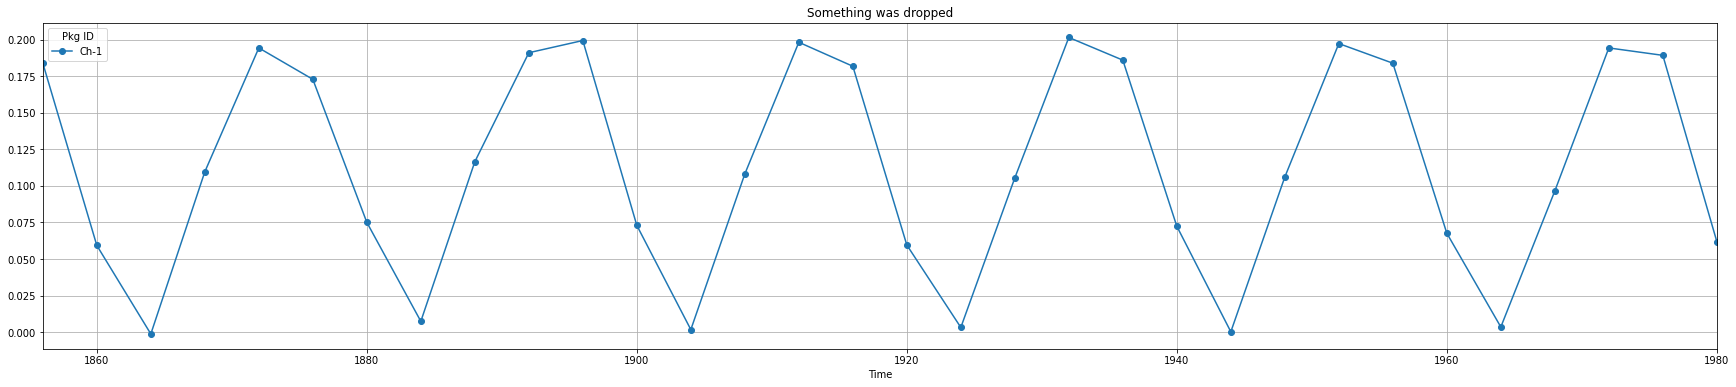

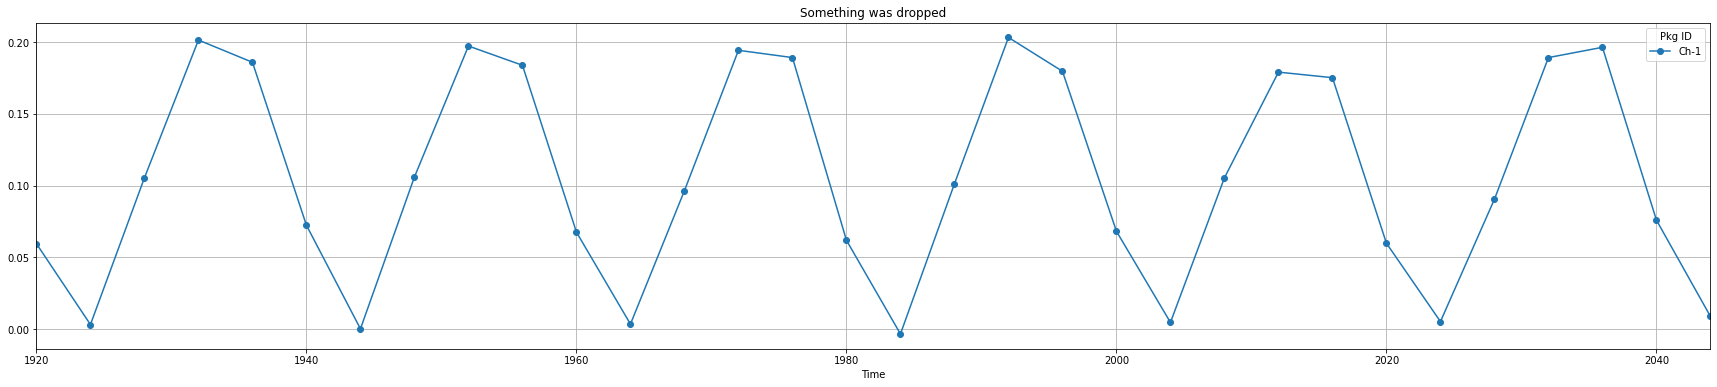

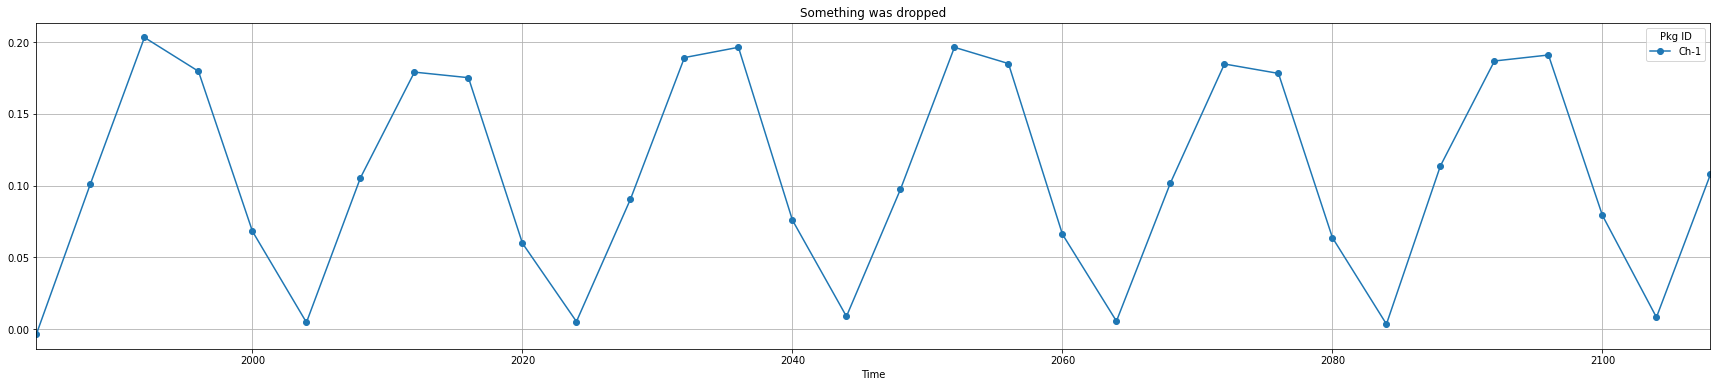

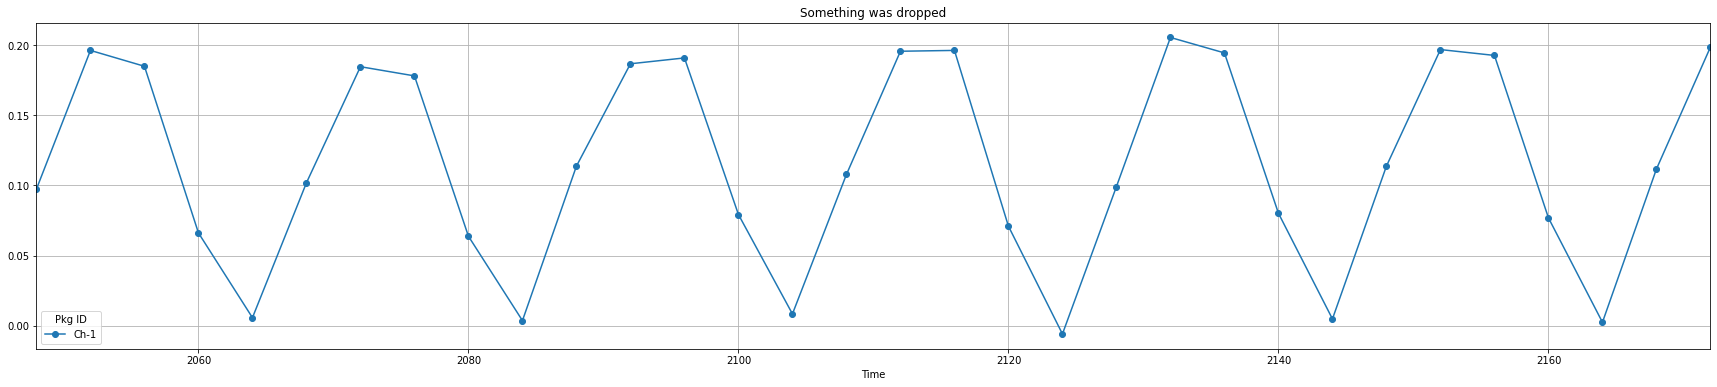

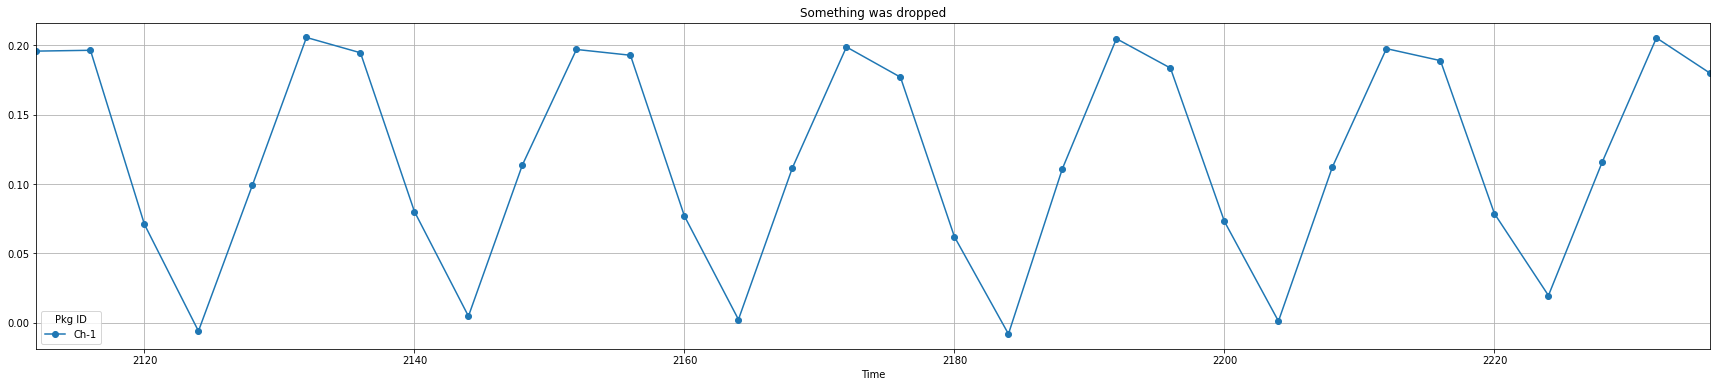

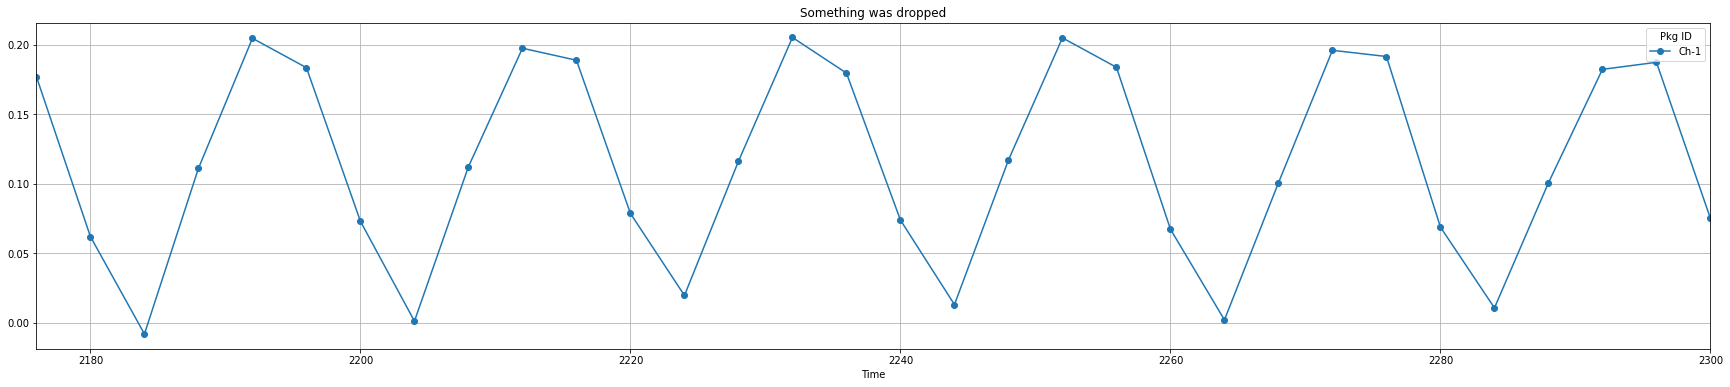

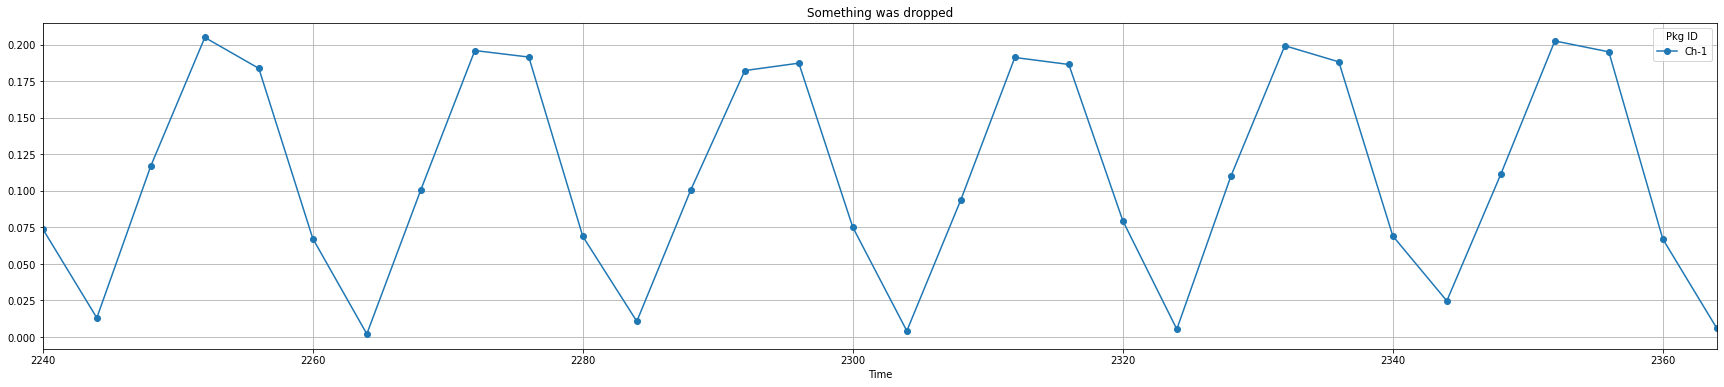

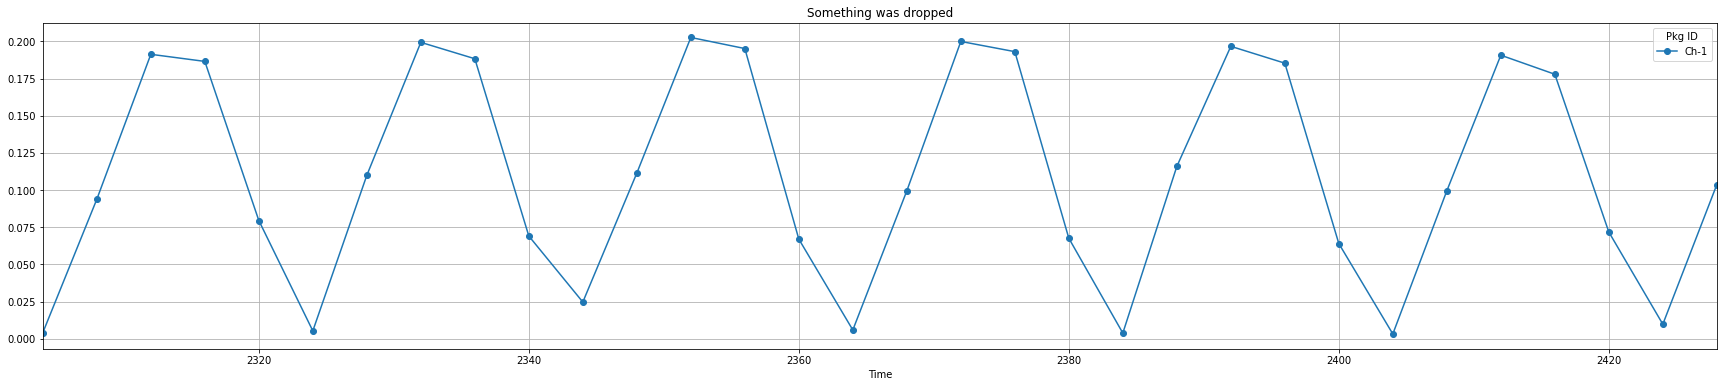

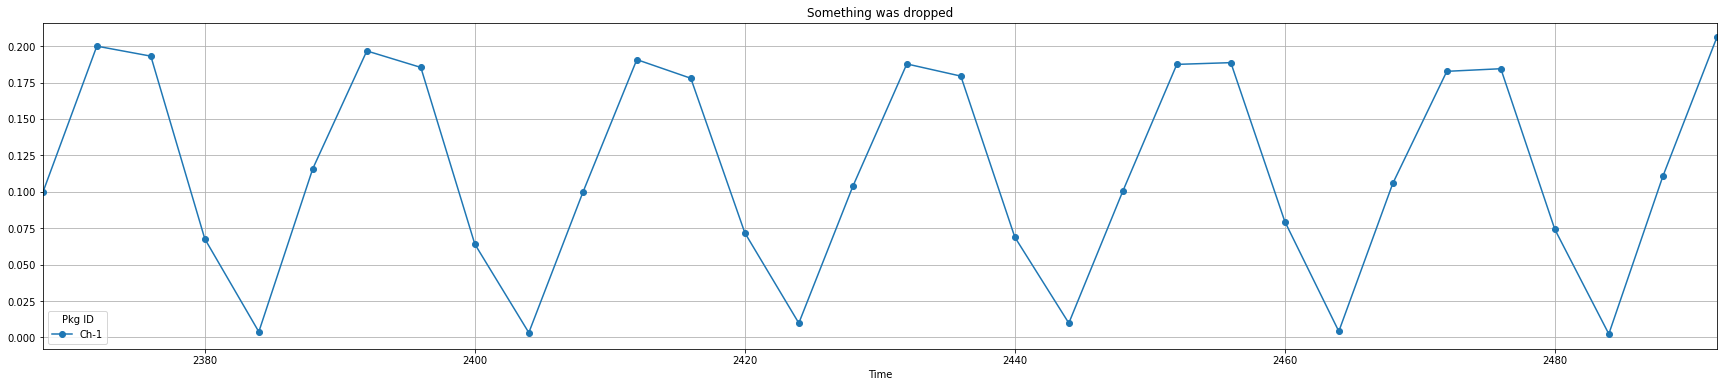

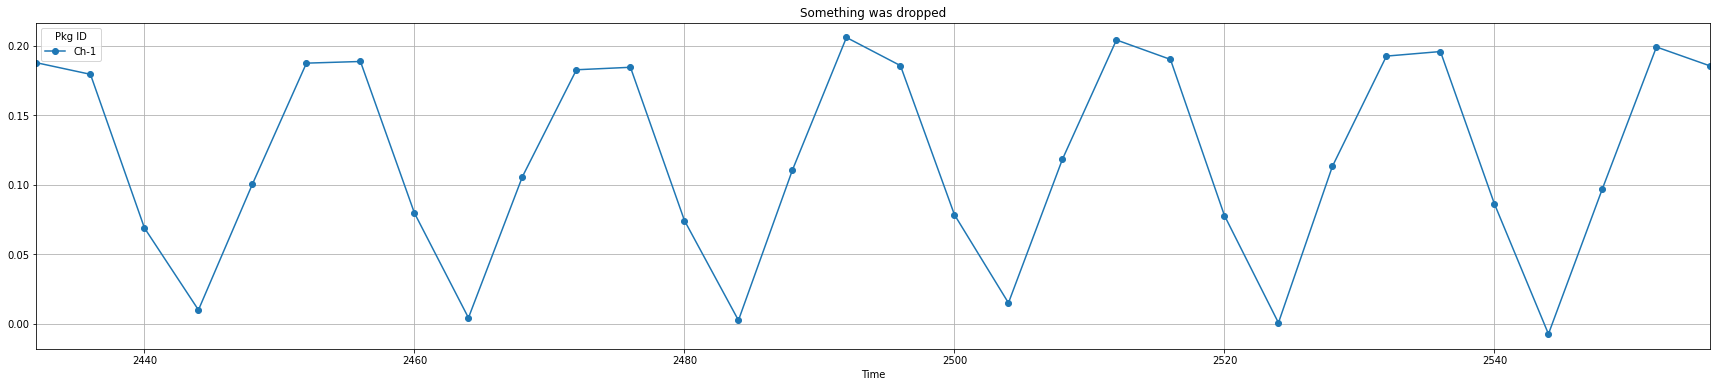

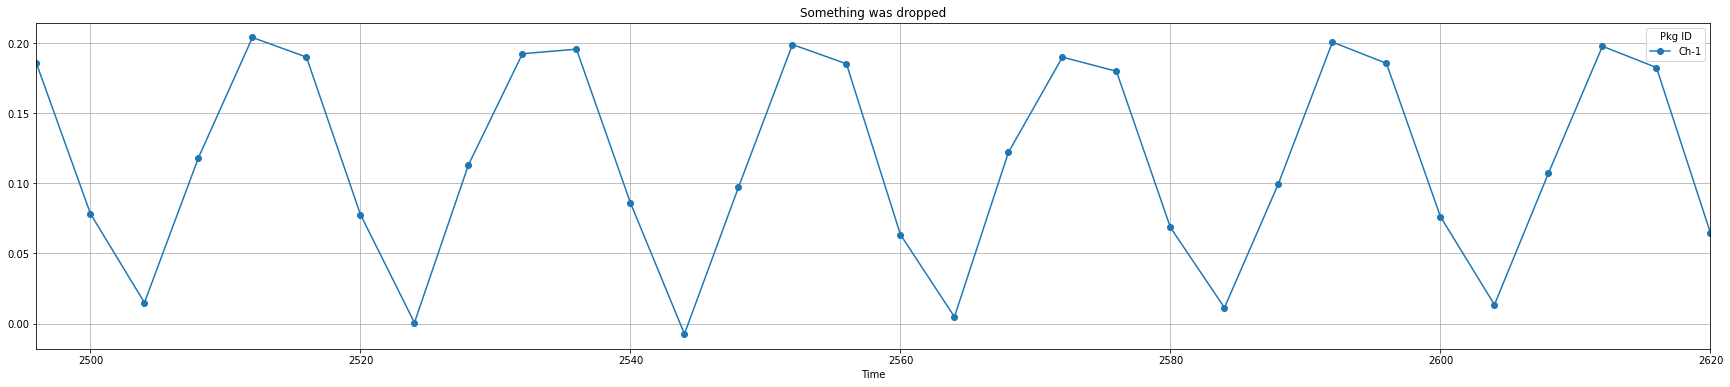

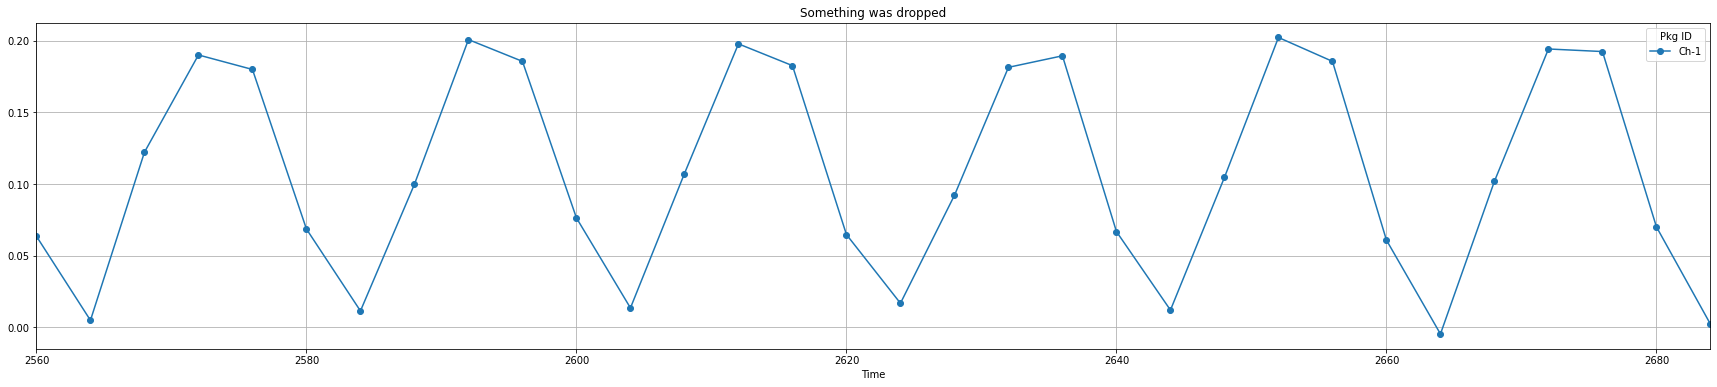

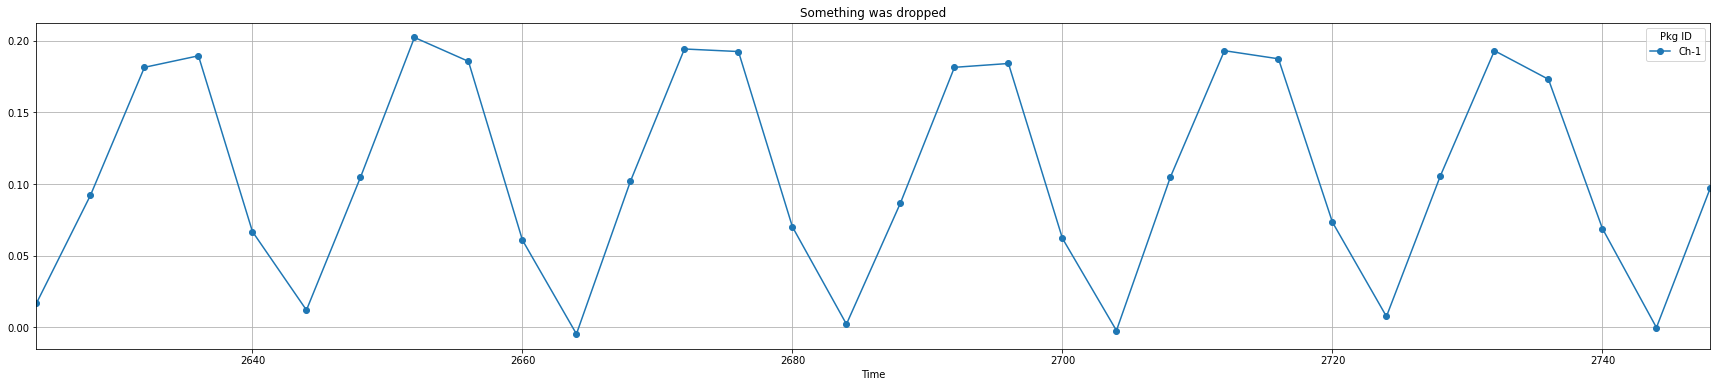

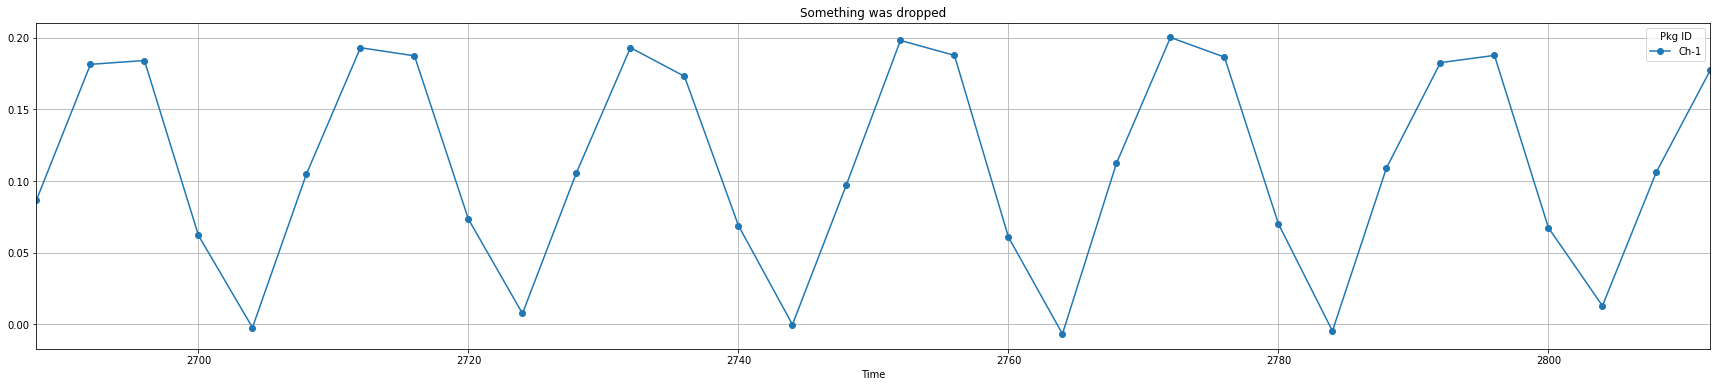

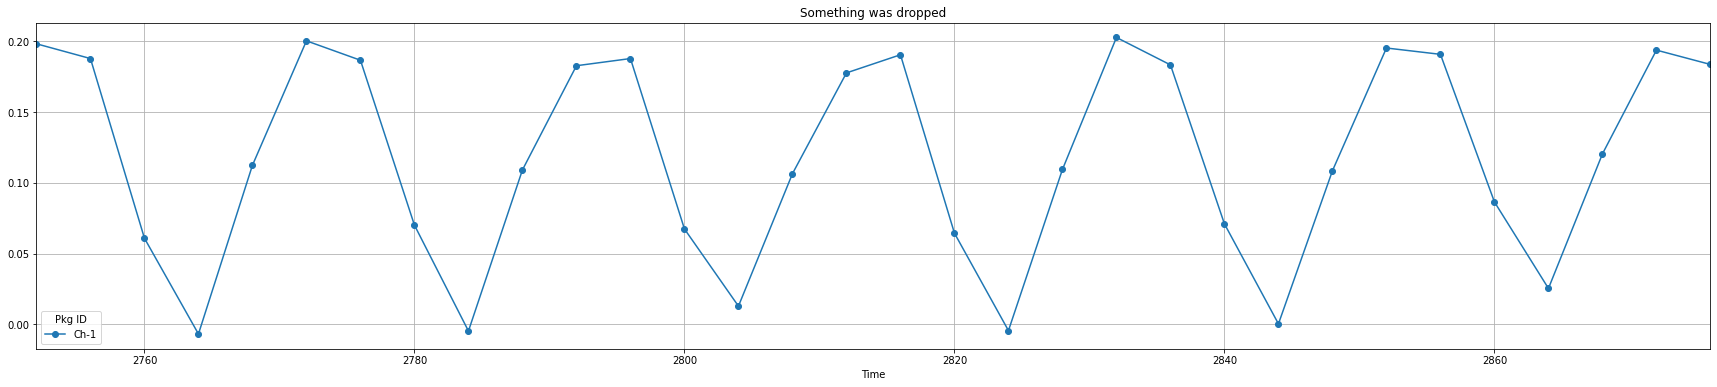

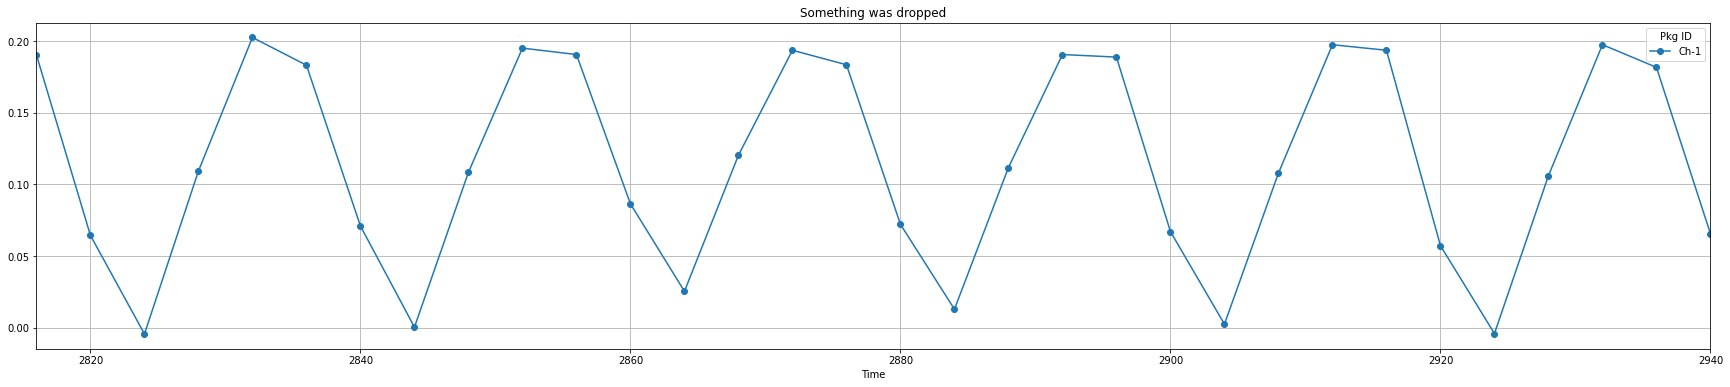

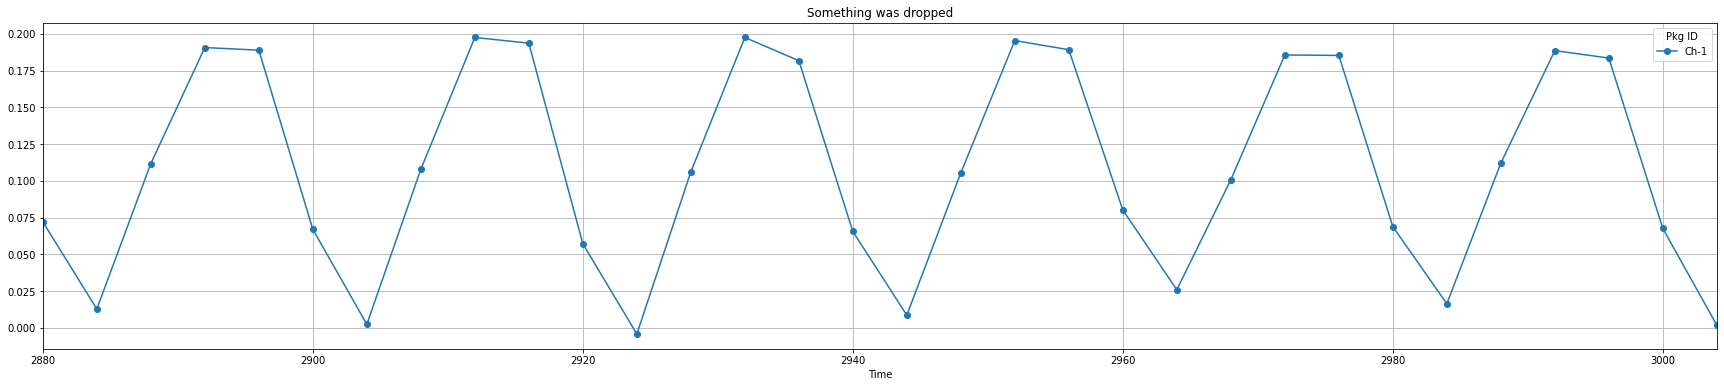

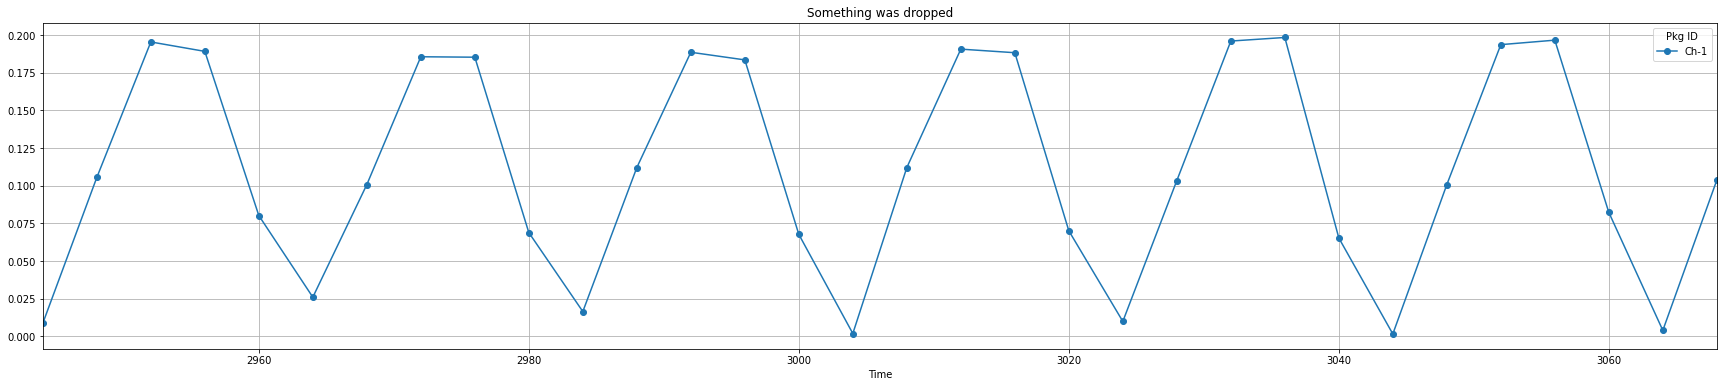

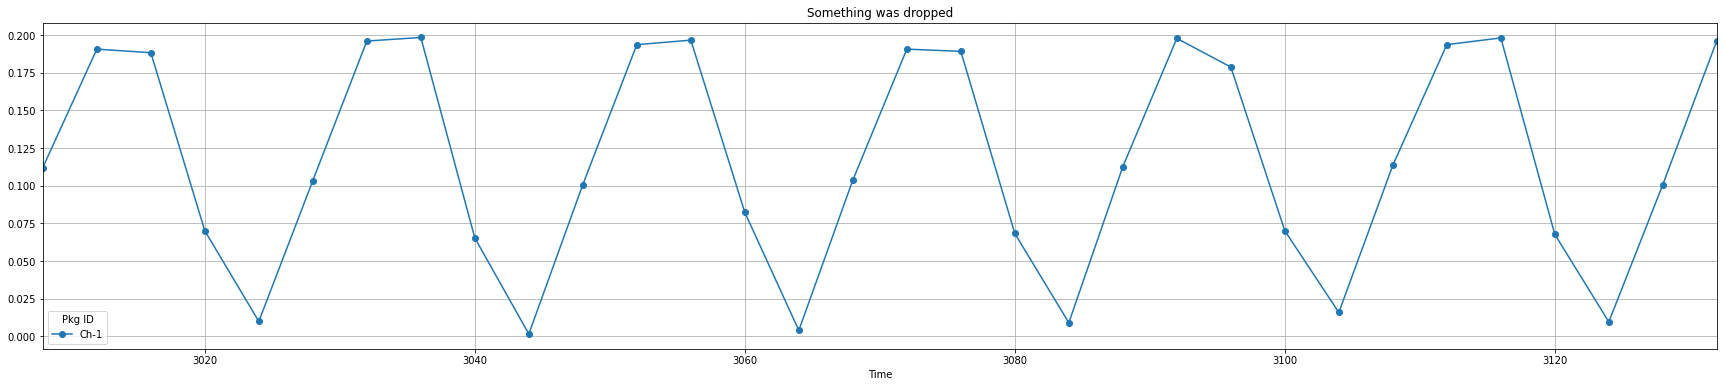

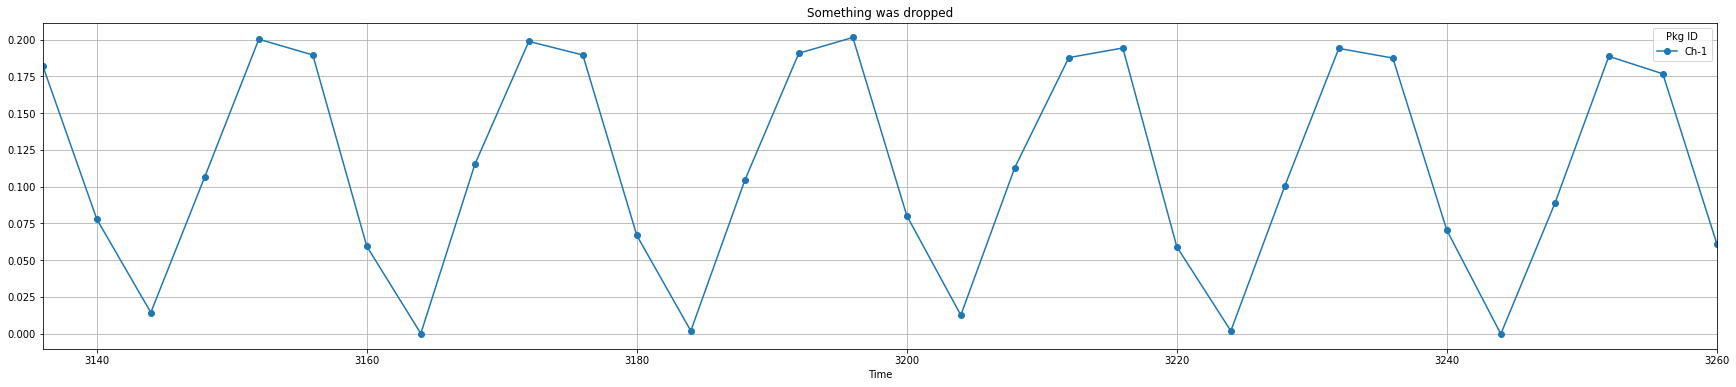

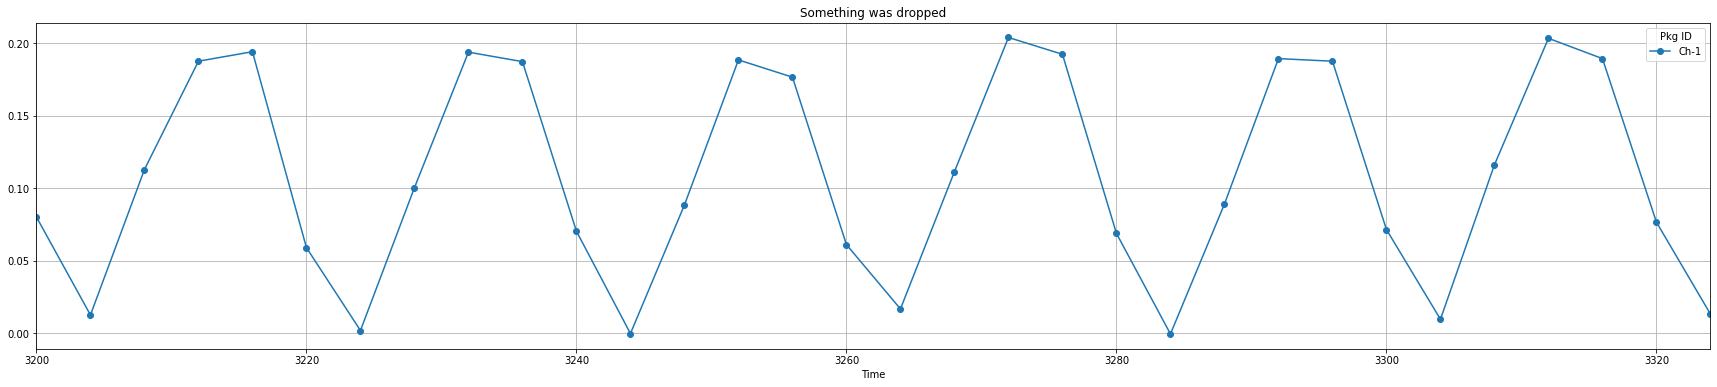

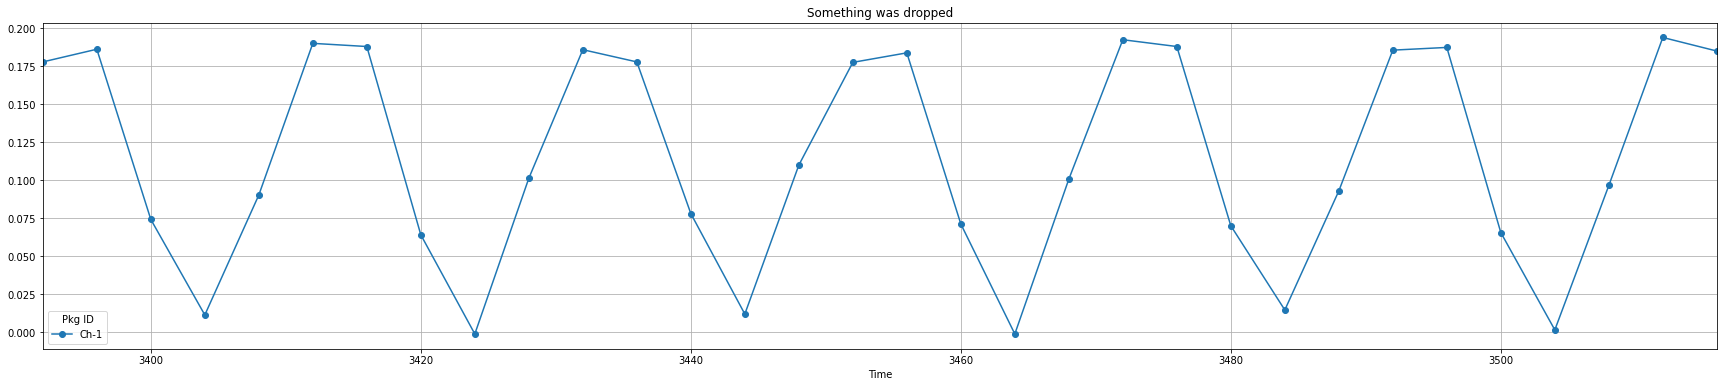

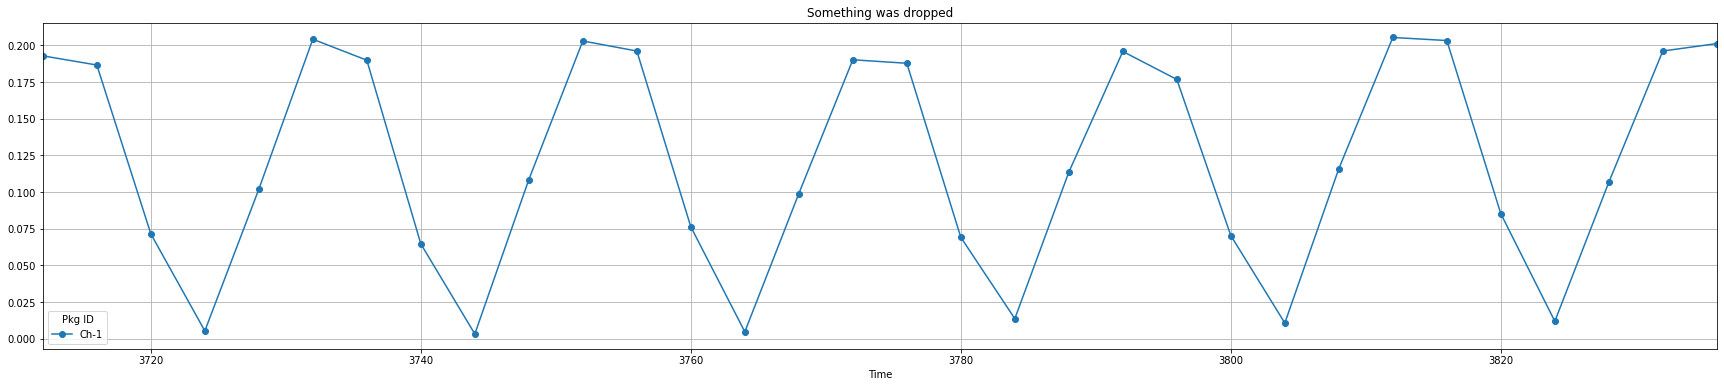

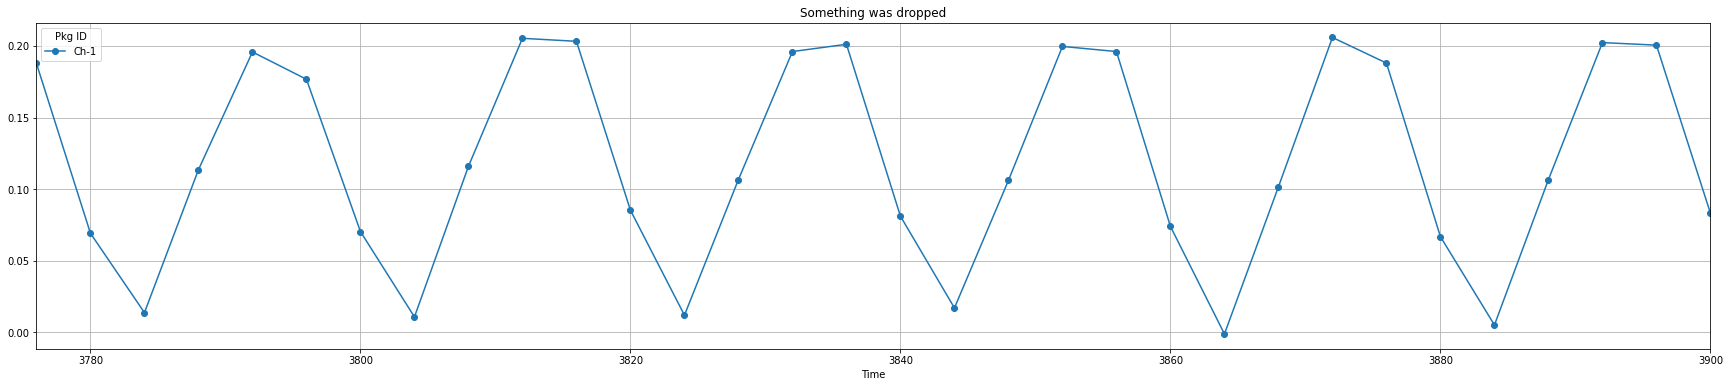

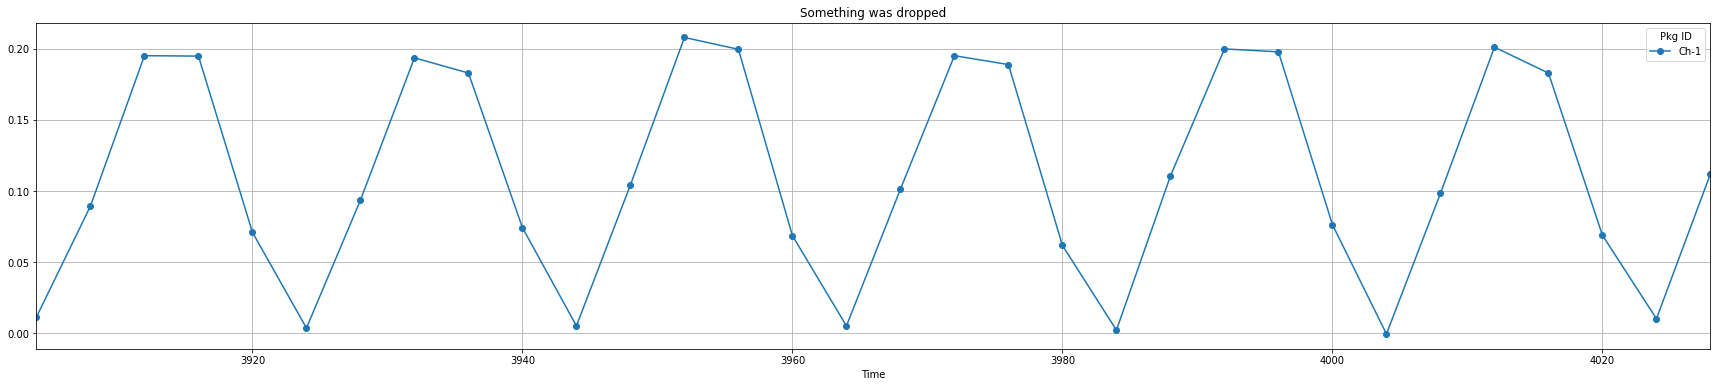

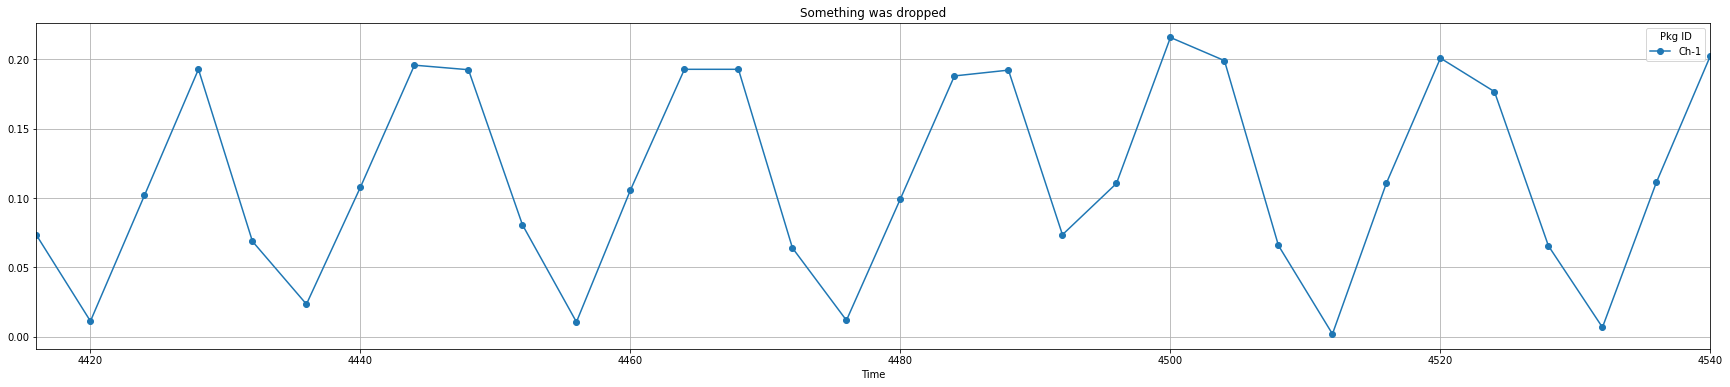

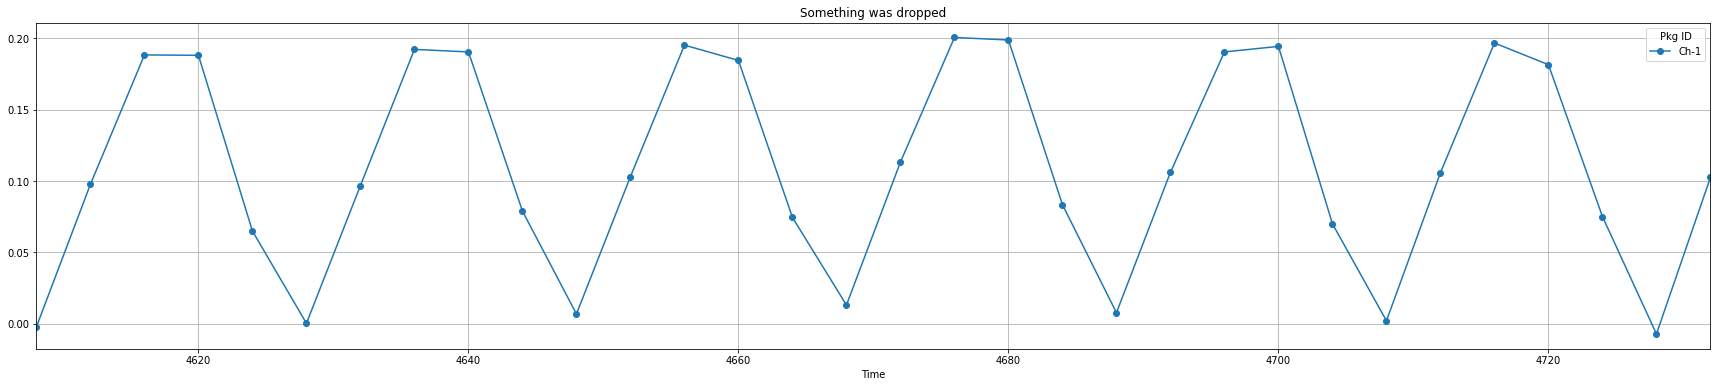

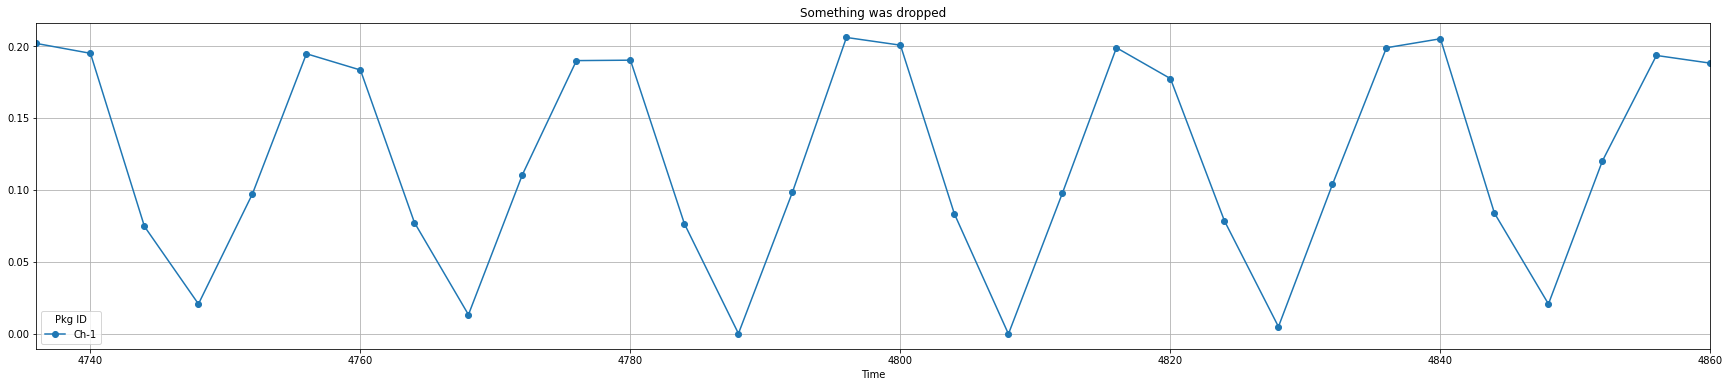

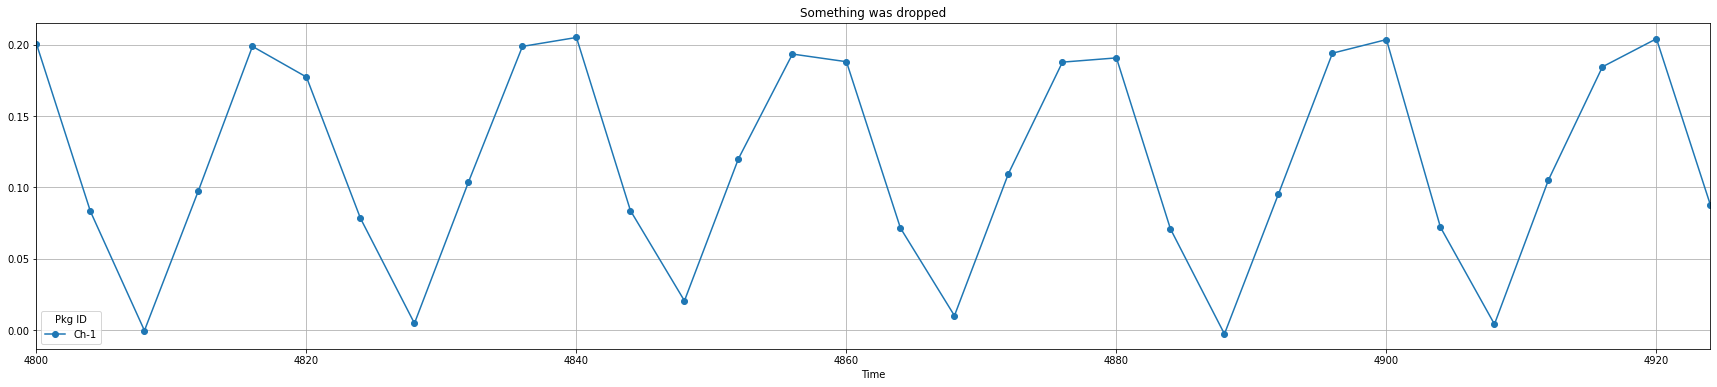

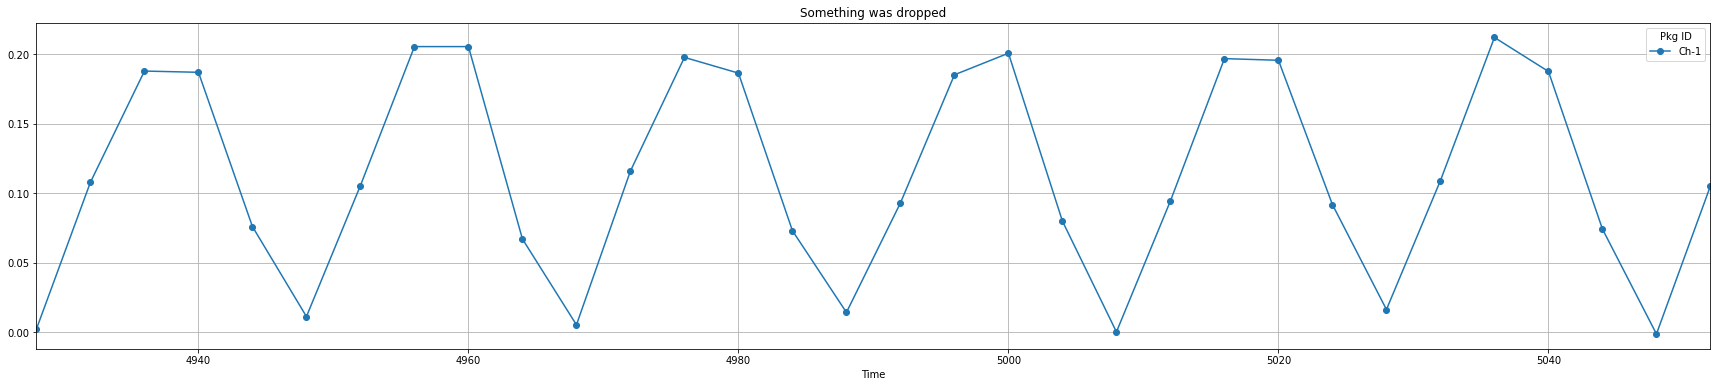

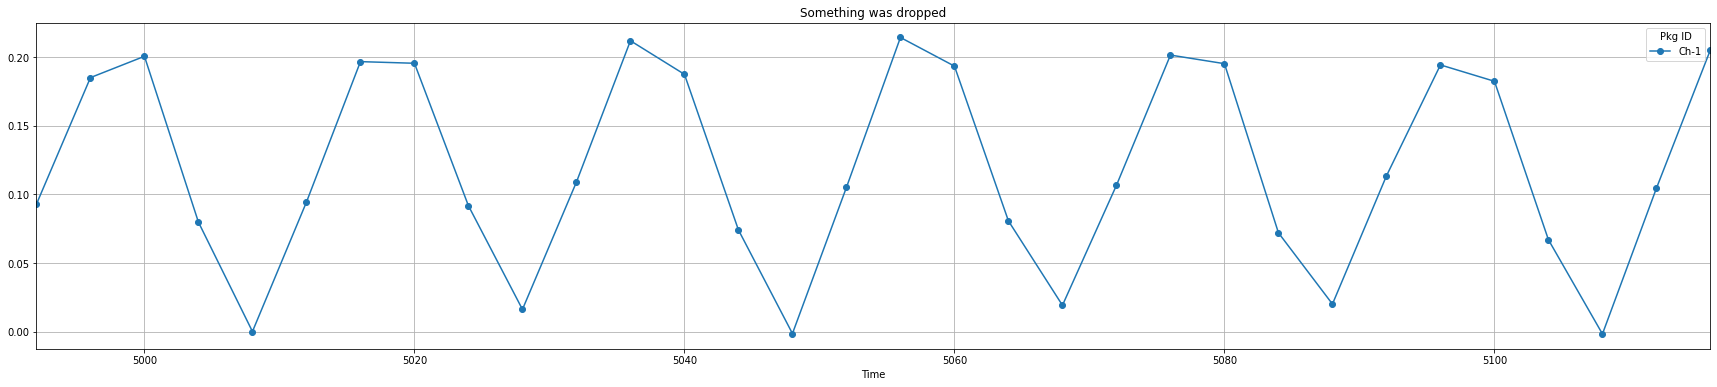

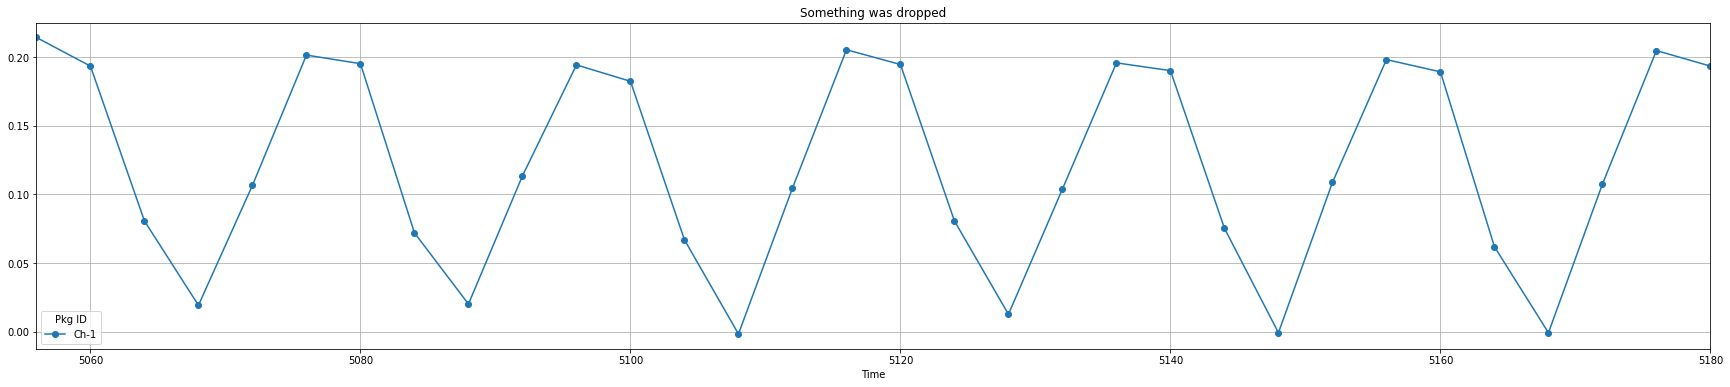

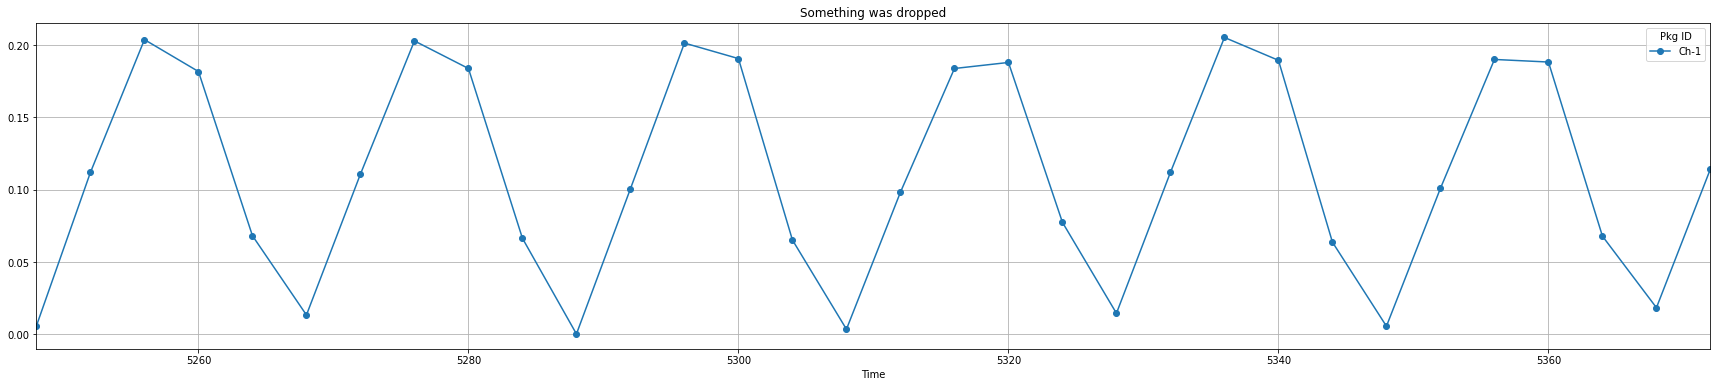

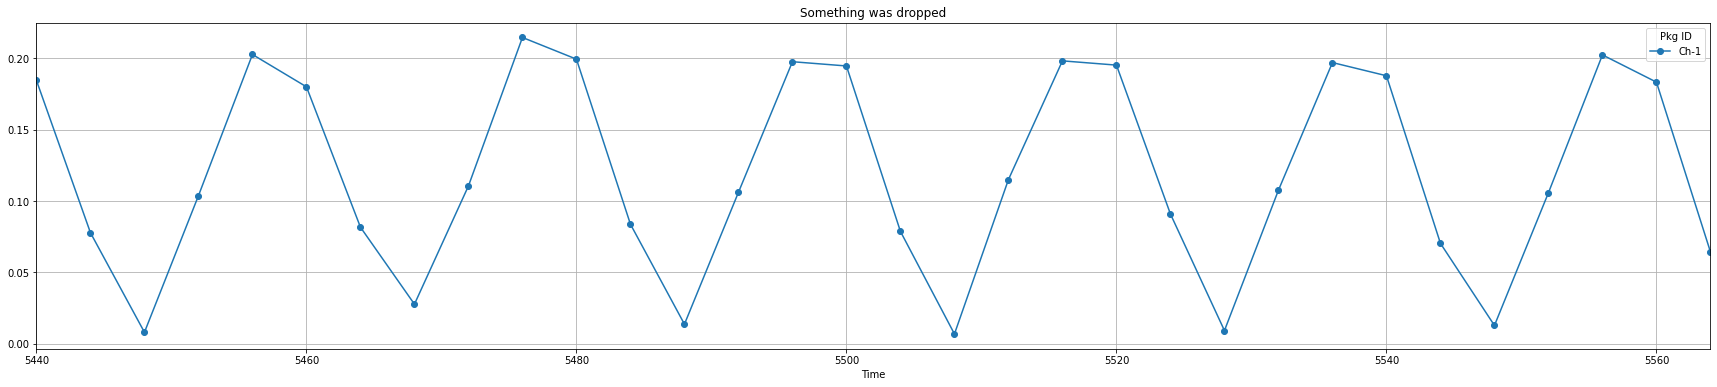

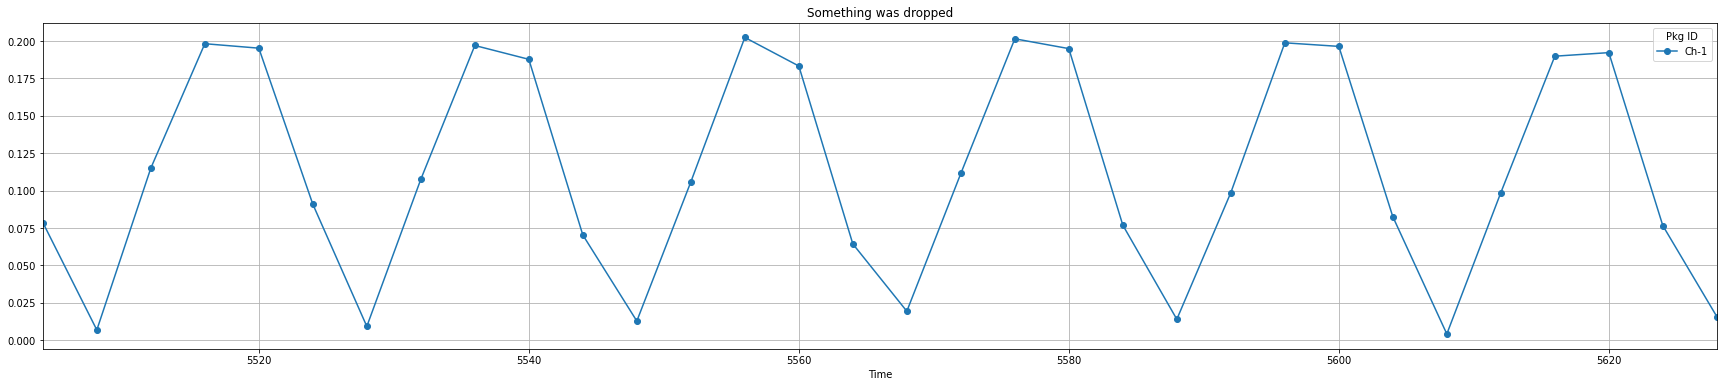

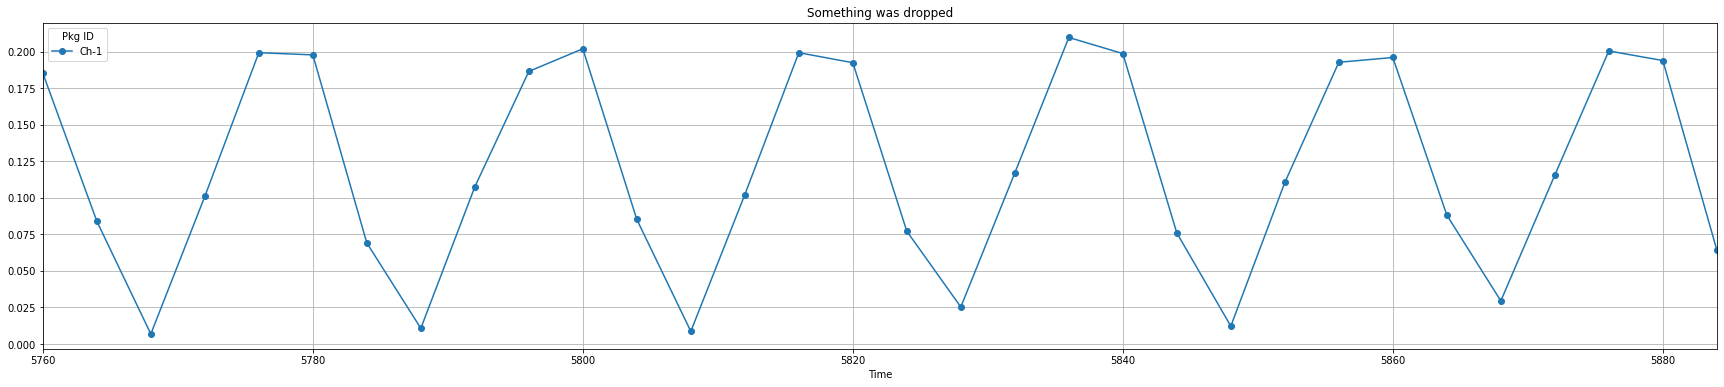

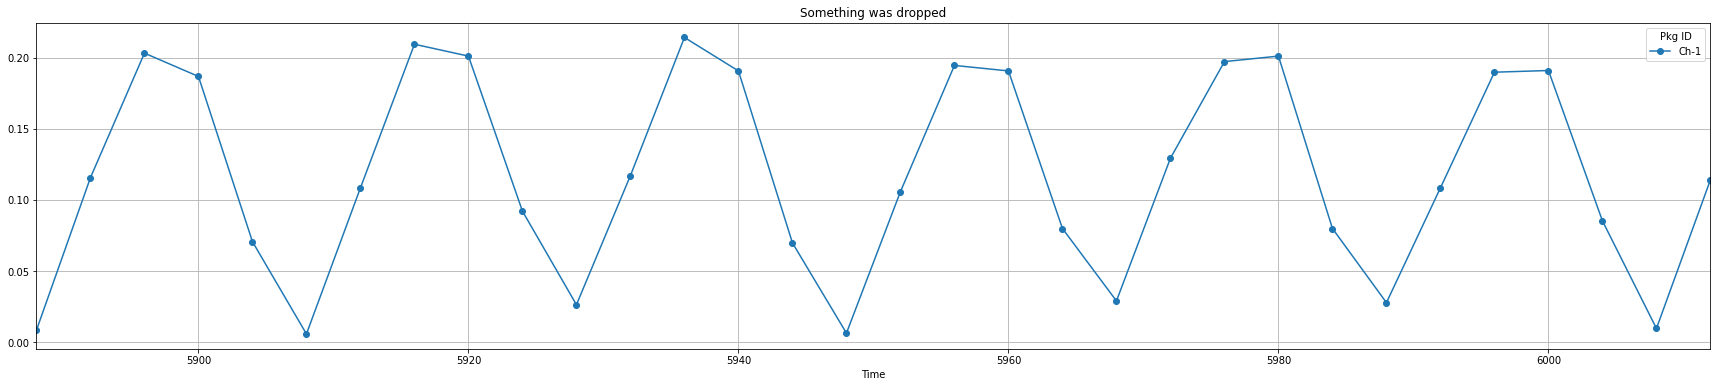

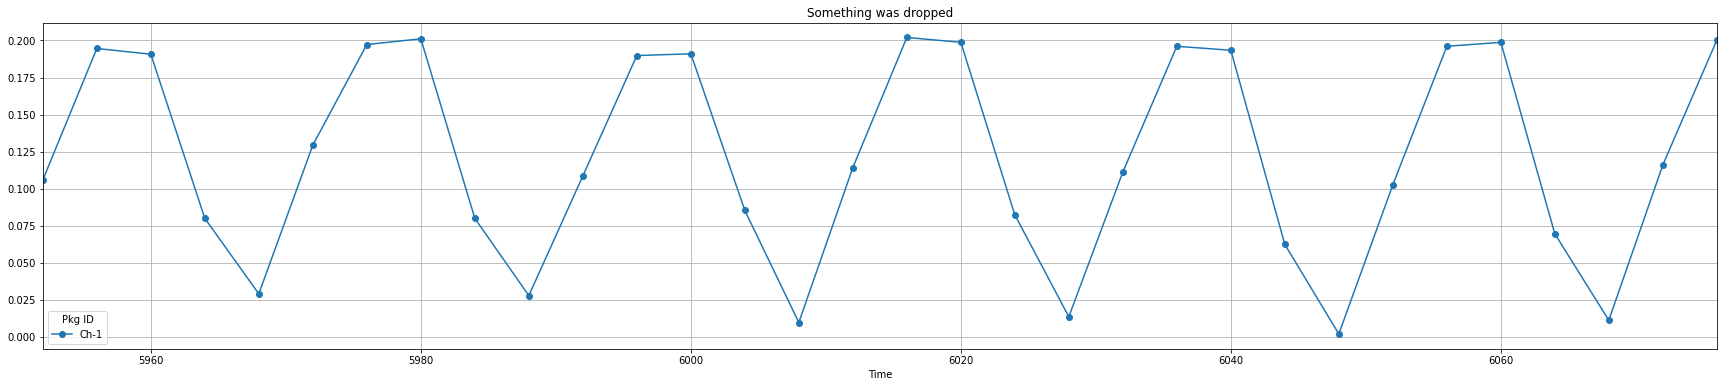

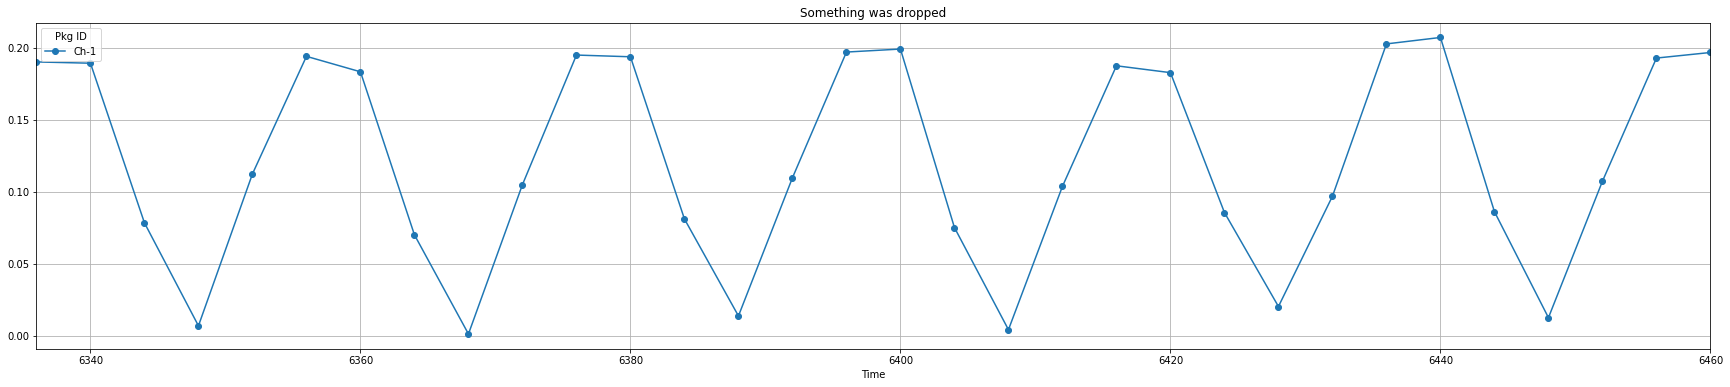

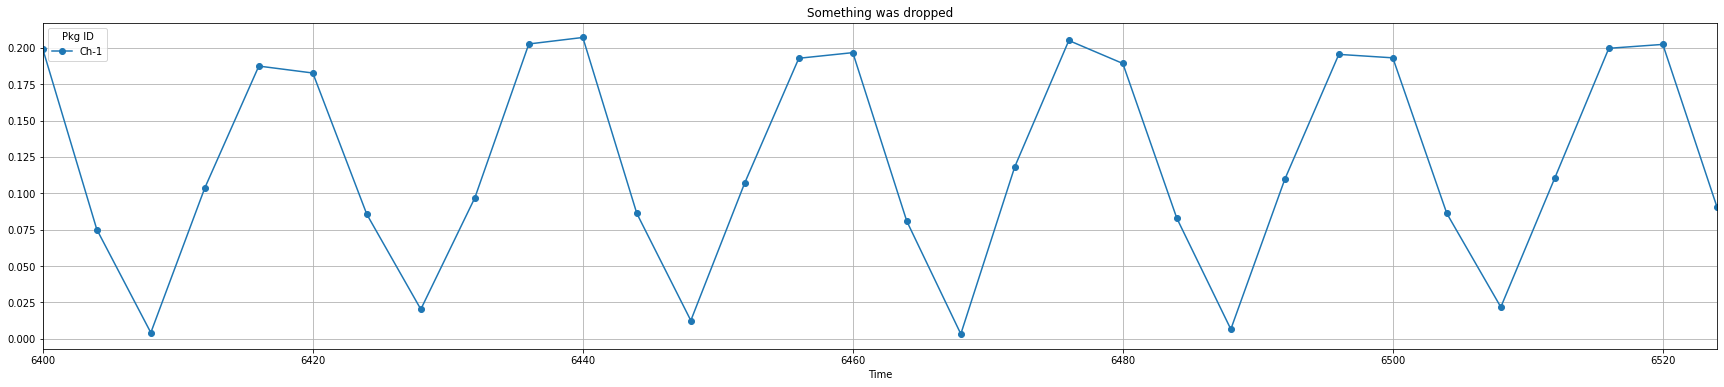

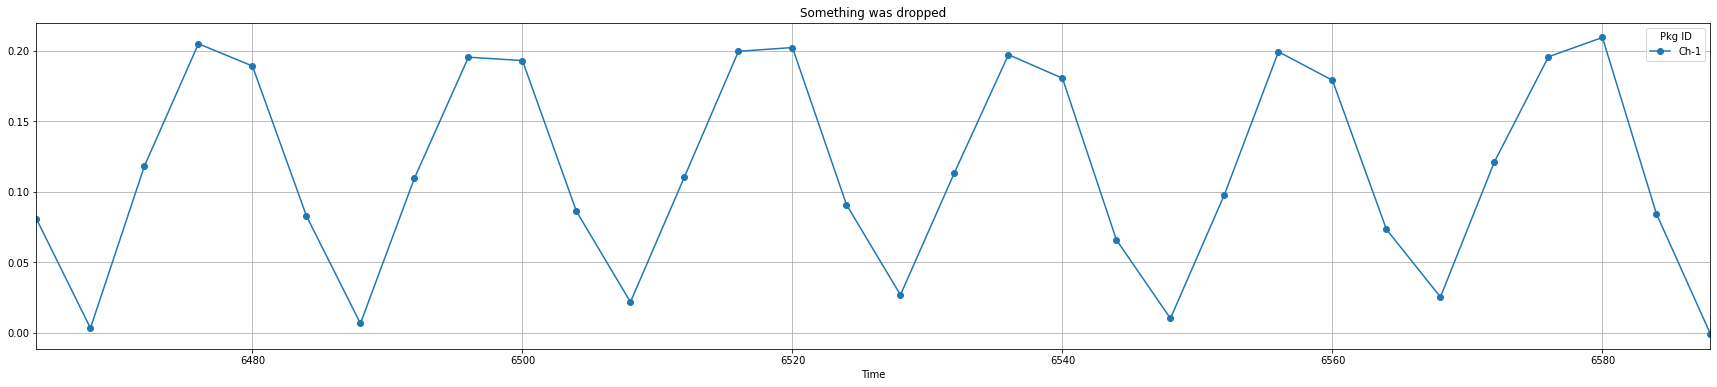

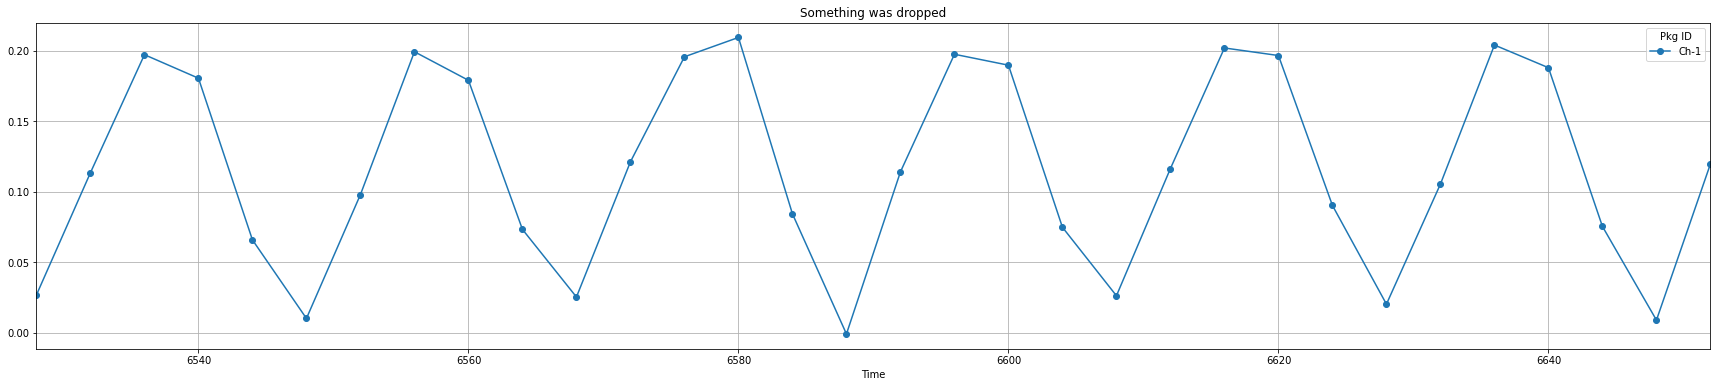

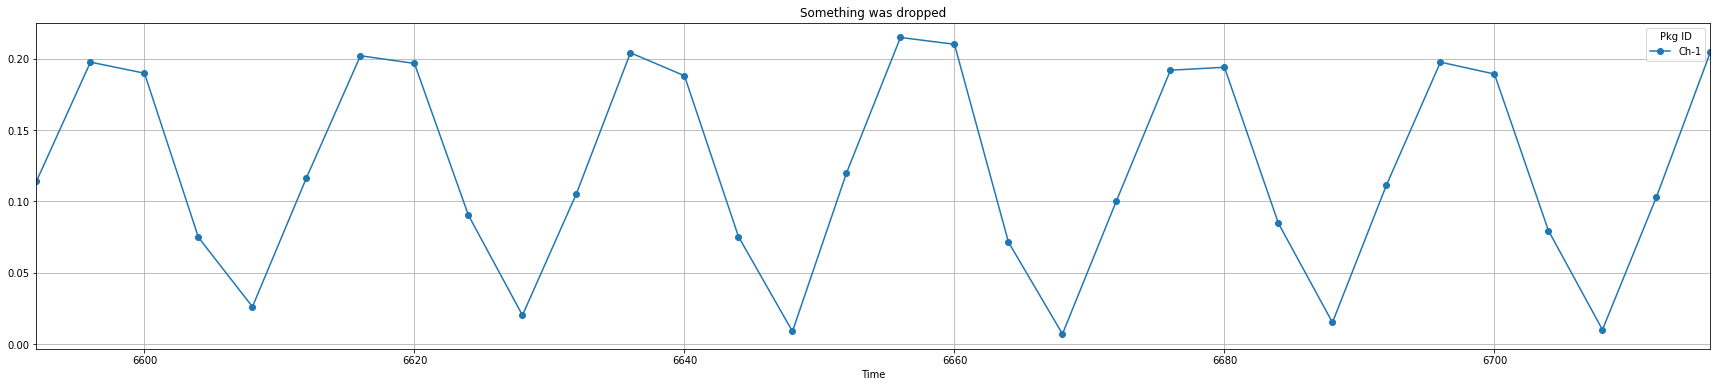

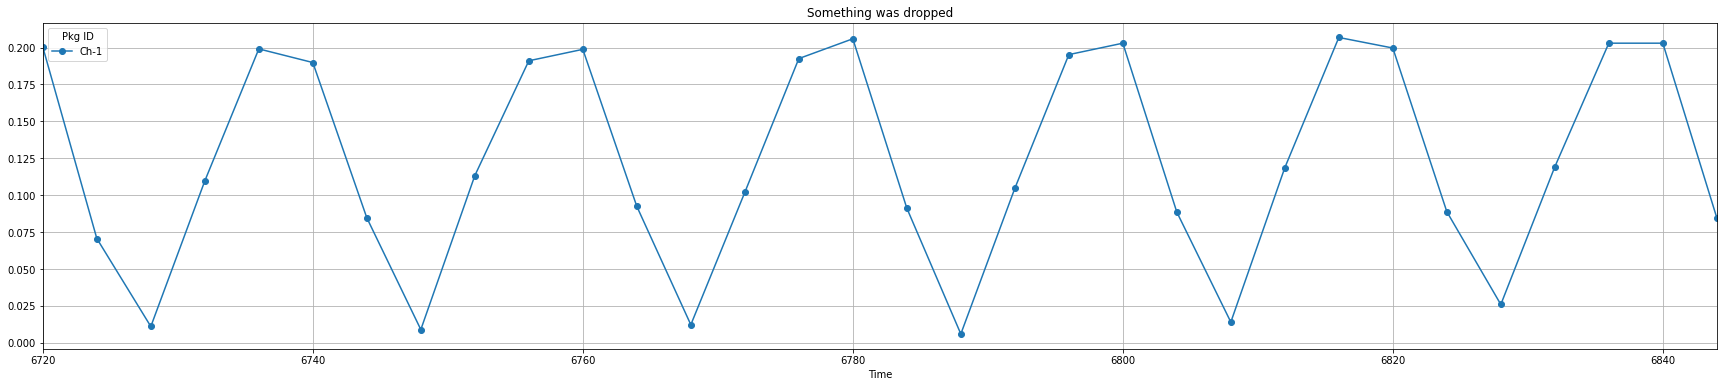

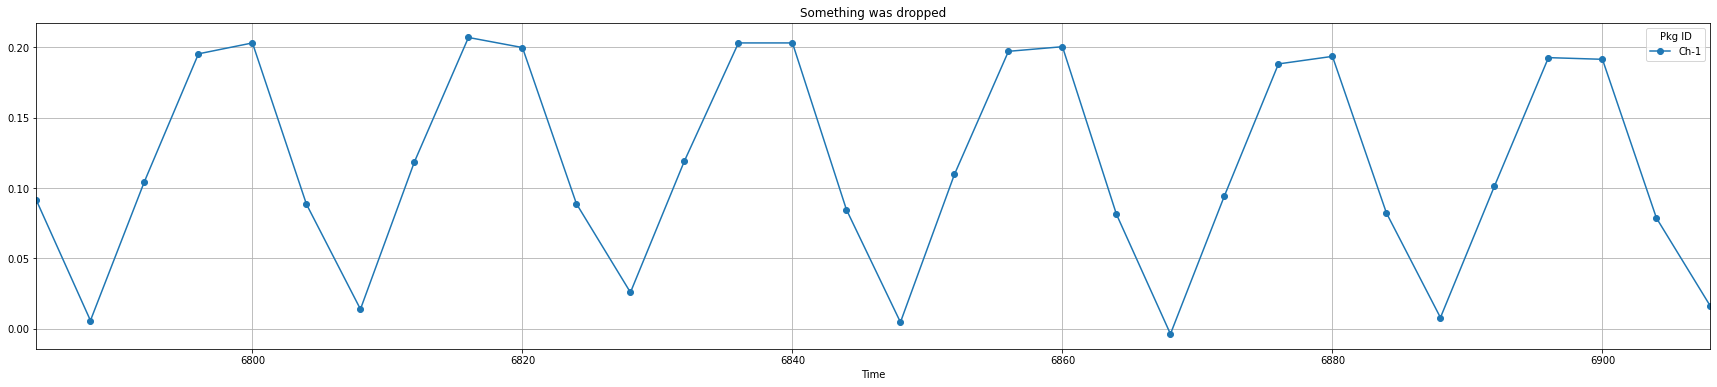

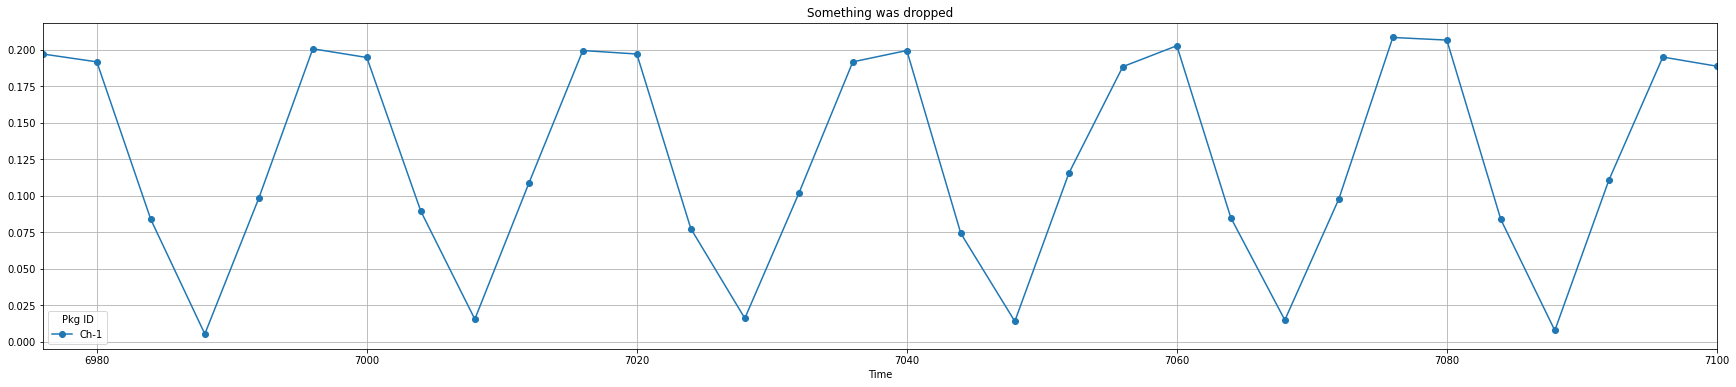

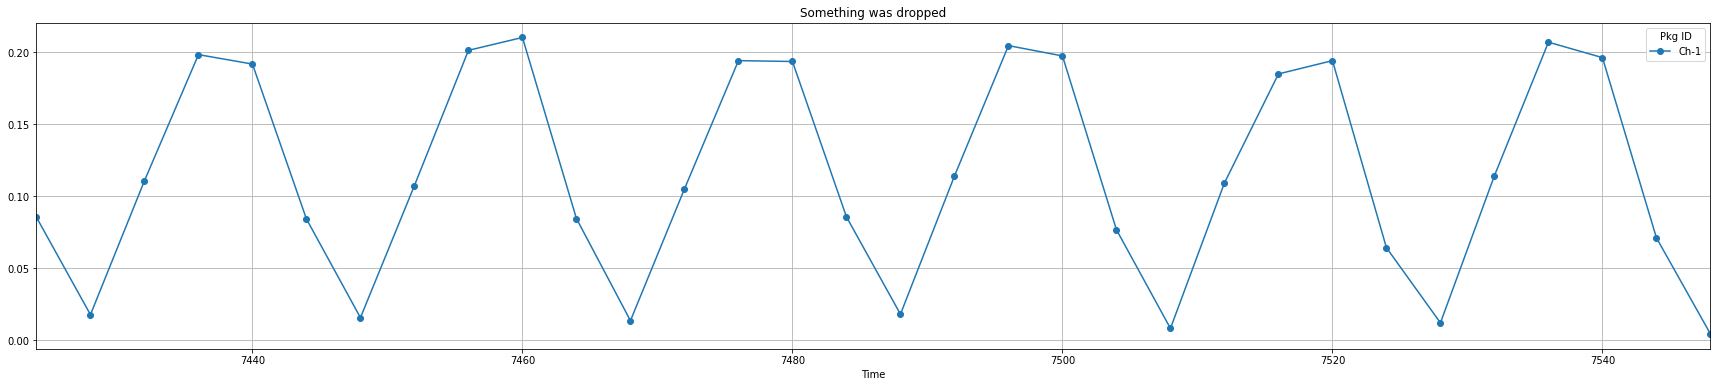

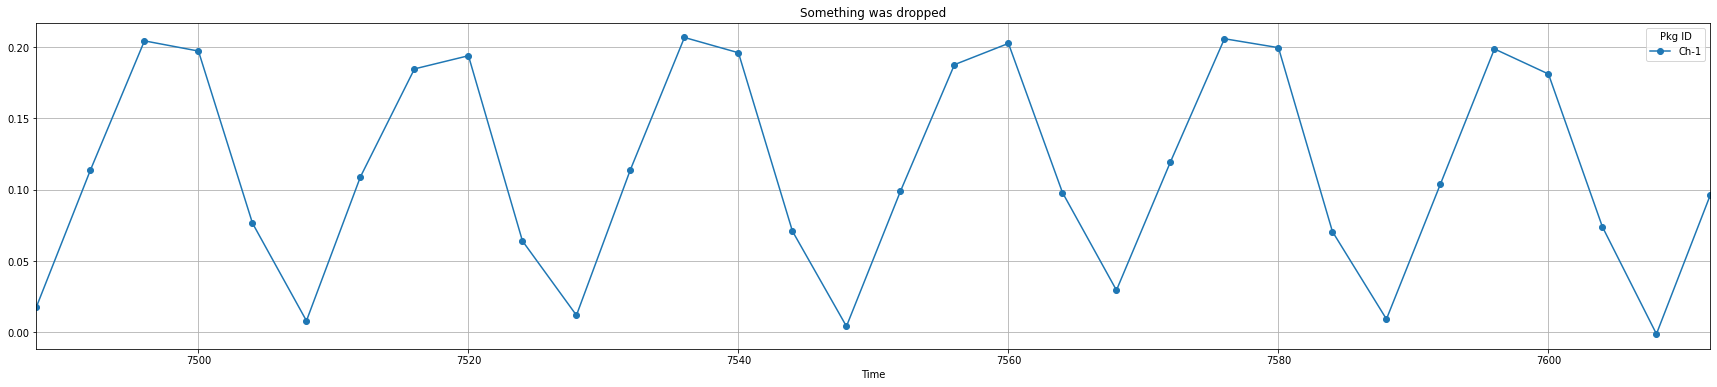

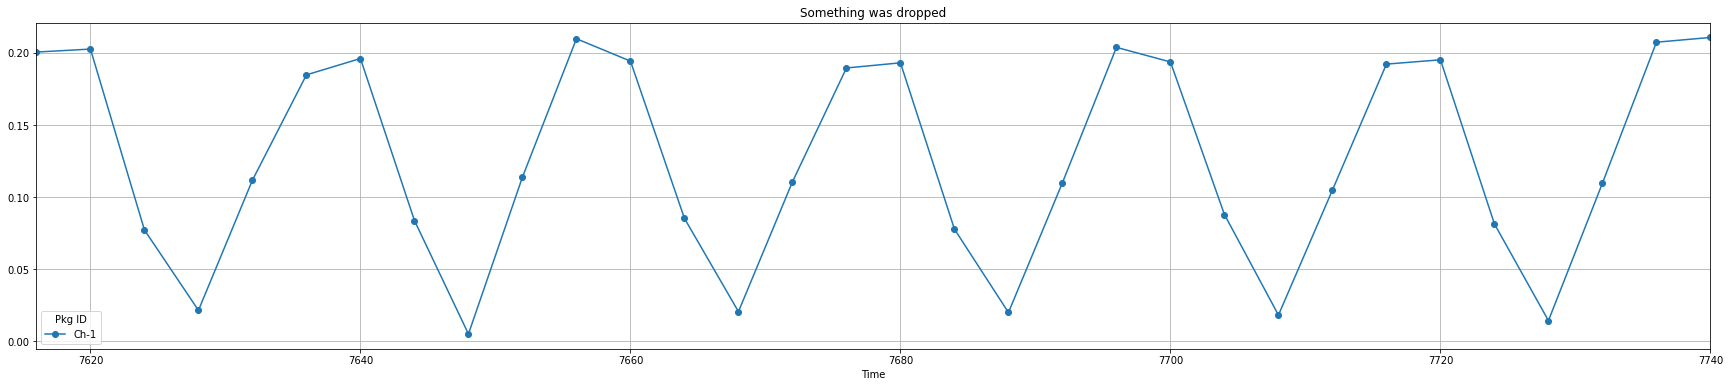

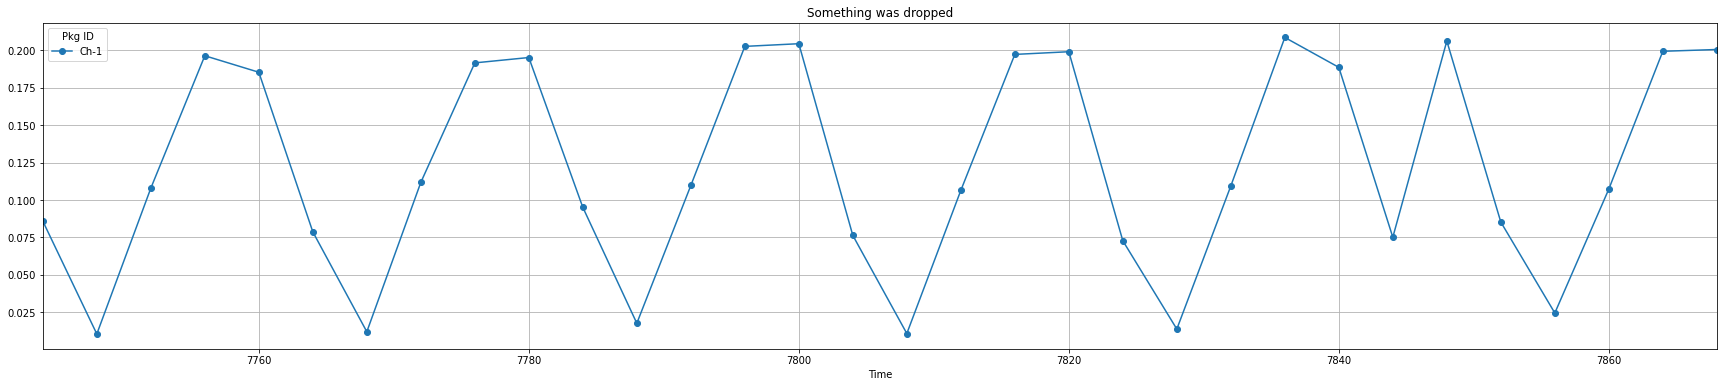

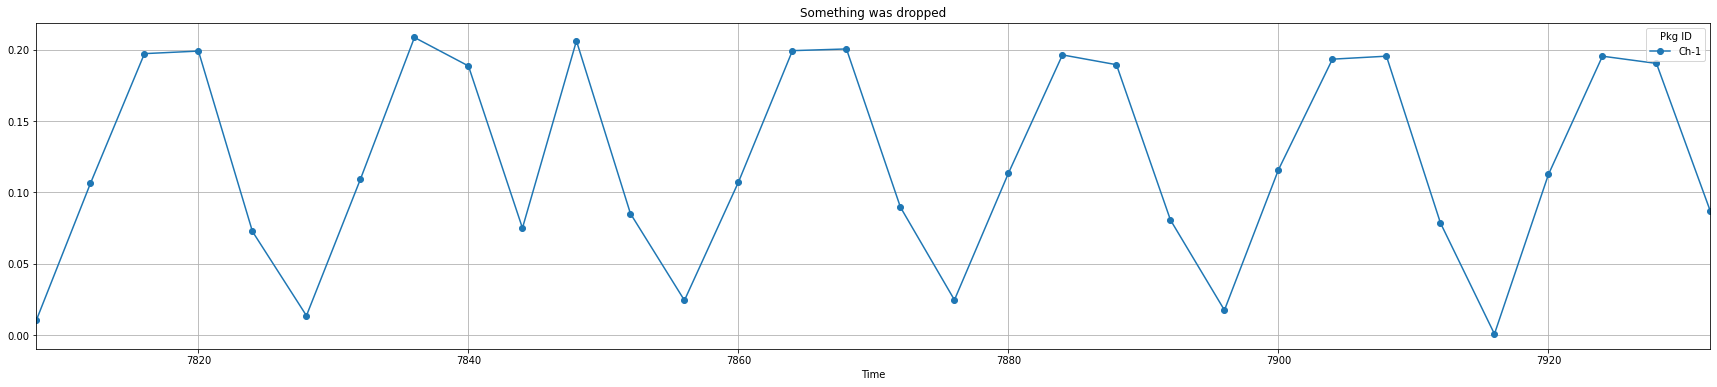

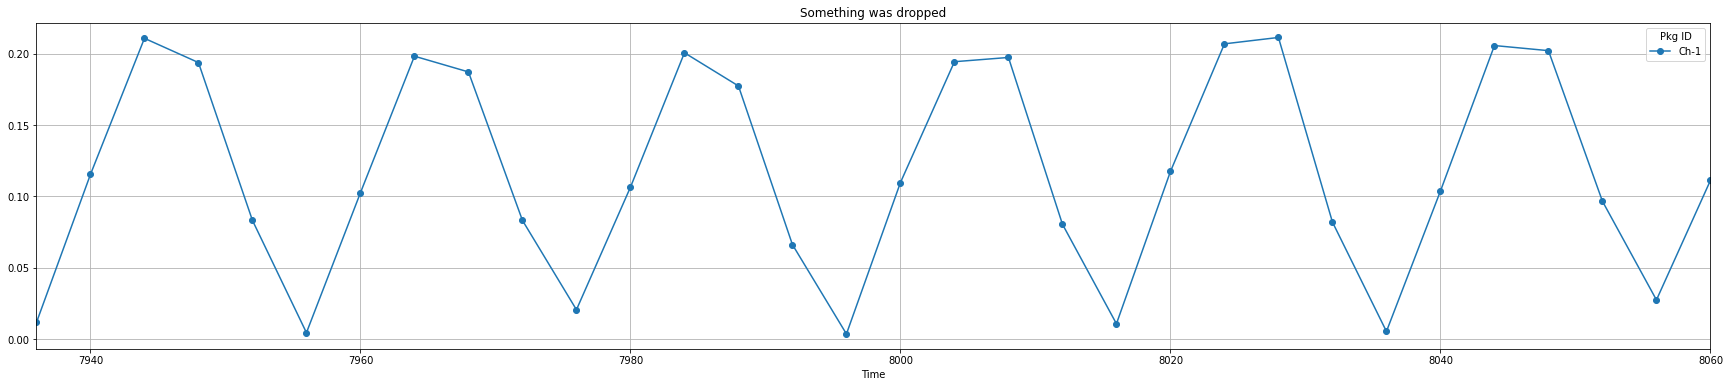

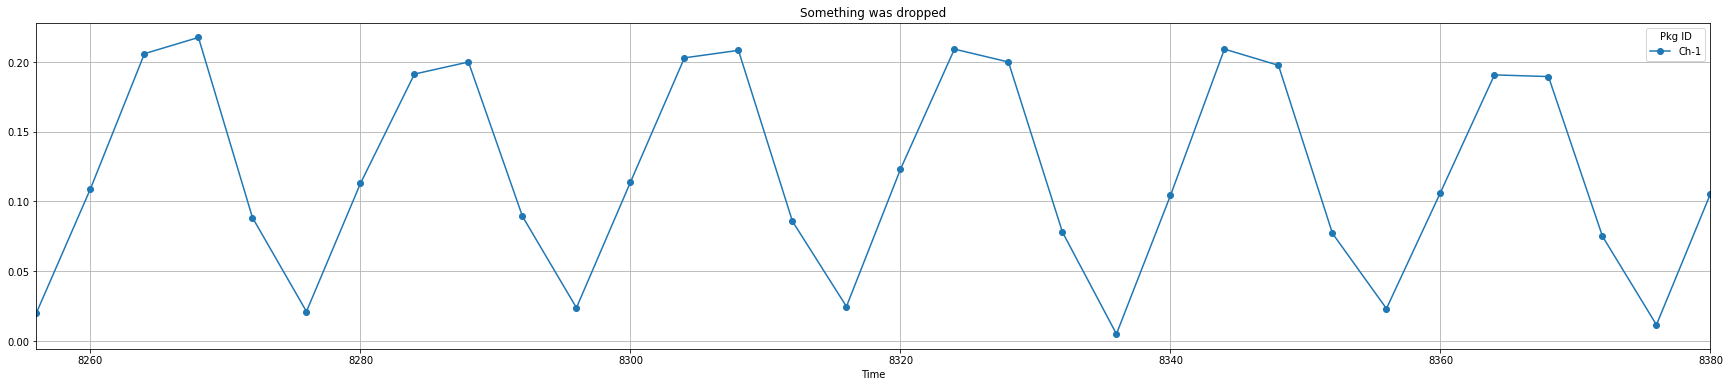

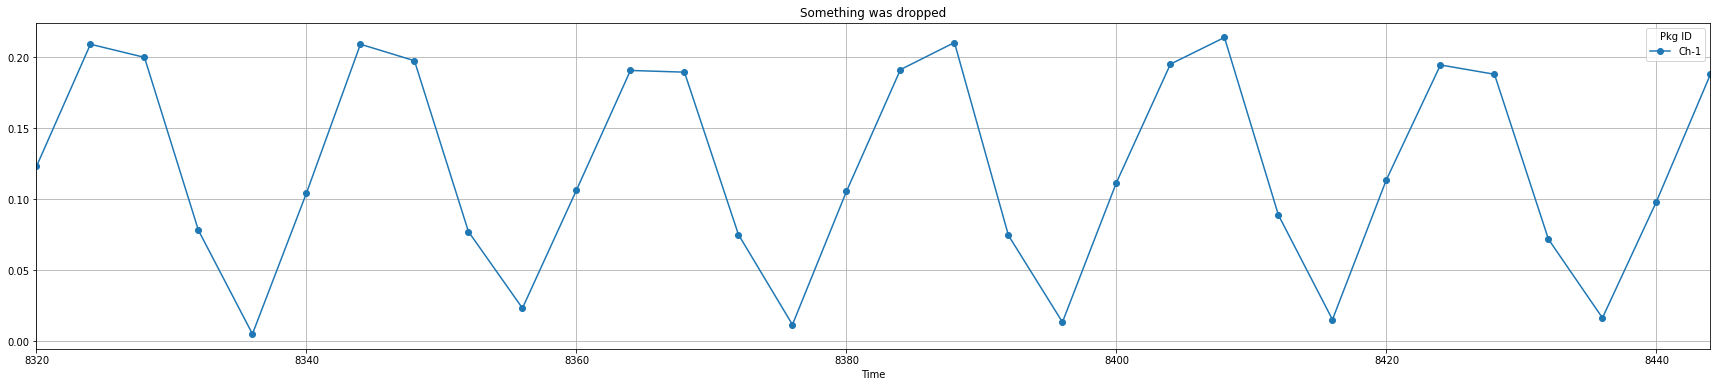

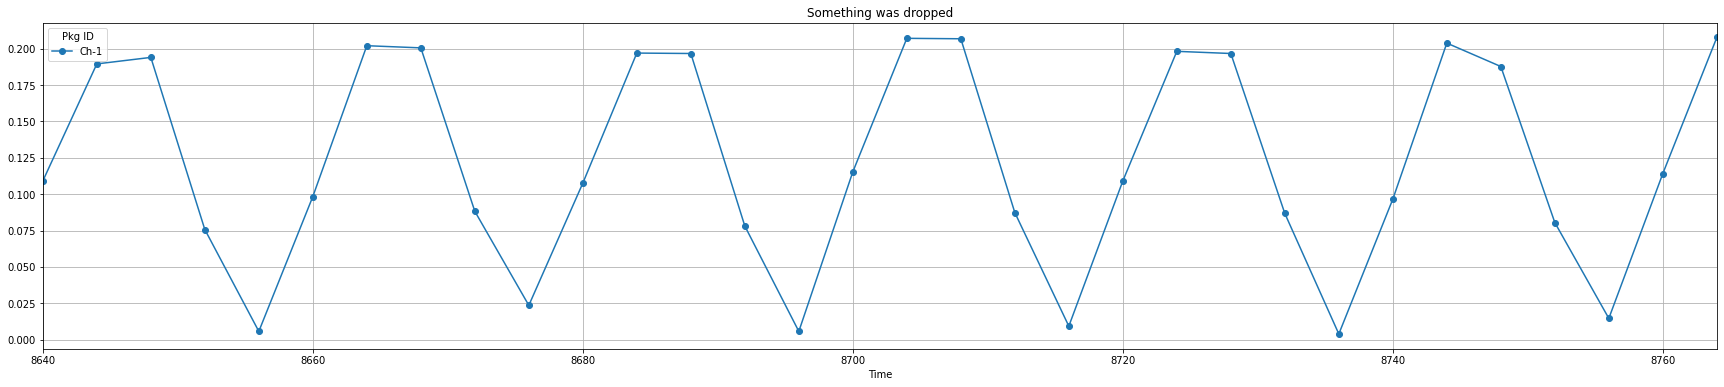

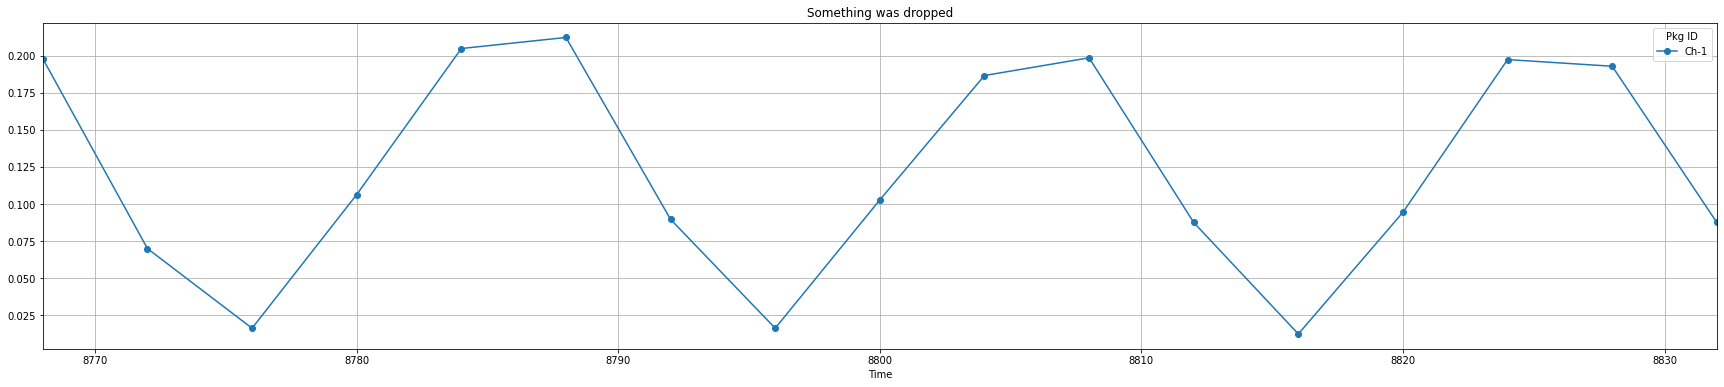

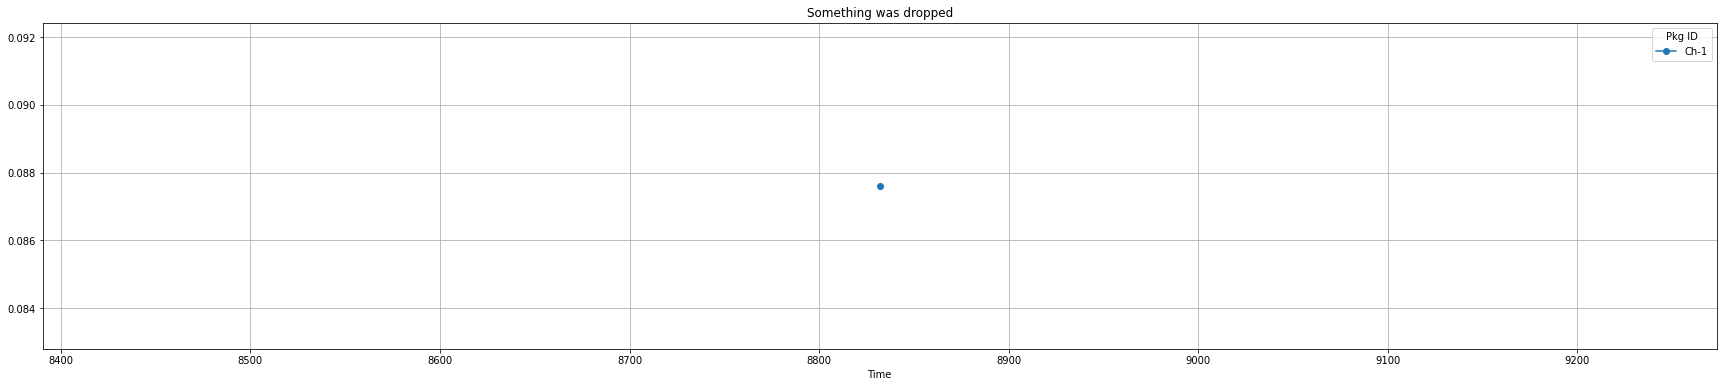

In [5]:
perfect_set ={1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1, 0} # make it set # contains 16 
test_tupl = [('1', '2', '3', '4', '5', '6', '7', '-8', '-7', '-6', '-4', '-3', '-2', '-1', '0', '1')]

ids_array = []
for tupl in setomatico: # wtf dou you still use nested for loops?
    one_set = set()
    for i in tupl: # because I don't want to think about other ways. Who cares? Why are you still talking to yourself??
        interger = int(i)
        one_set.add(interger)
    ids_array.append(one_set)


    
#print(ids_array)    
    



counter = 0
for one_set in ids_array:
    is_set = perfect_set.issubset(one_set)
    print(is_set)
    counter+=1
    if not(is_set):
        start_plot = (counter -1) * 16
        end = (counter +1) * 16
        print(start_plot,end)
        Pkg.iloc[start_plot:end].plot(y = ["Ch-1", "Pkg"], grid = True, title = "Something was dropped", marker='o', figsize = (30,6))
        print(counter)

print(grouper('ABCDEFG', 3, 'x'))